#**Predicting Churn Rate**

###Reading Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('/content/drive/MyDrive/GL-DSBA-20-21/Capstone Project/Telecom_Sampled.csv')

In [4]:
df.head()

,mou_Mean,totmrc_Mean,rev_Range,mou_Range,change_mou,drop_blk_Mean,drop_vce_Range,owylis_vce_Range,mou_opkv_Range,months,totcalls,income,eqpdays,custcare_Mean,callwait_Mean,iwylis_vce_Mean,callwait_Range,ccrndmou_Range,adjqty,ovrrev_Mean,rev_Mean,ovrmou_Mean,comp_vce_Mean,plcd_vce_Mean,avg3mou,avgmou,avg3qty,avgqty,avg6mou,avg6qty,crclscod,asl_flag,prizm_social_one,area,refurb_new,hnd_webcap,marital,ethnic,age1,age2,...,hnd_price,actvsubs,uniqsubs,forgntvl,dwlltype,dwllsize,mailordr,occu1,opk_dat_Mean,mtrcycle,numbcars,retdays,truck,wrkwoman,roam_Mean,recv_sms_Mean,blck_dat_Mean,mou_pead_Mean,churn,solflag,proptype,mailresp,cartype,car_buy,children,csa,da_Mean,da_Range,datovr_Mean,datovr_Range,div_type,drop_dat_Mean,drop_vce_Mean,adjmou,totrev,adjrev,avgrev,Customer_ID,comp_dat_Mean,plcd_dat_Mean
0,190.25,63.9400,26.00,43.0,-11.25,4.666667,8,20,28.44,14,1104,9.0,403,0.000000,0.666667,10.333333,2,0,1104,2.050,53.4900,5.50,59.333333,73.333333,194,182.77,91,84.92,211.0,99.0,AA,N,T,ATLANTIC SOUTH AREA,N,WCMB,M,N,36.0,0.0,...,199.98999,2,2,0.0,S,A,B,A,0.0,0.0,NaN,NaN,0.0,Y,0.0,0.0,0.0,0.000000,0,NaN,A,R,NaN,UNKNOWN,Y,AIRCOL803,0.0000,0.00,0.0000,0.00,NaN,0.0,3.666667,2376.0,519.07,489.08,37.62,1064525,0.000000,0.000000
1,443.00,39.9900,5.10,199.0,-78.00,4.333333,5,33,72.46,13,2237,9.0,404,1.333333,0.000000,16.333333,0,14,2230,8.840,34.3575,25.00,87.000000,104.333333,469,463.75,188,185.83,467.0,166.0,EA,N,U,LOS ANGELES AREA,N,WCMB,U,S,0.0,0.0,...,149.98999,1,1,0.0,NaN,NaN,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,0.0,0.0,0.0,0.883333,0,NaN,NaN,NaN,NaN,New,NaN,LAXCUL310,0.2475,0.99,0.8775,3.51,NaN,0.0,3.000000,5565.0,598.53,538.55,44.88,1048538,0.333333,0.333333
2,400.50,44.9900,13.88,172.0,-67.50,2.000000,1,7,93.60,29,3276,6.0,213,1.000000,0.000000,0.000000,0,28,3269,4.725,40.5350,13.50,124.666667,153.000000,423,291.33,134,121.07,333.0,118.0,C,N,C,MIDWEST AREA,N,WCMB,M,N,32.0,30.0,...,99.98999,1,1,0.0,S,A,B,NaN,0.0,0.0,1.0,NaN,0.0,NaN,0.0,0.0,0.0,0.000000,0,NaN,NaN,R,E,New,Y,STLSTL314,0.4950,1.98,0.0000,0.00,NaN,0.0,0.333333,7866.0,1616.71,1586.36,58.75,1010139,0.000000,0.333333
3,53.50,34.6675,18.56,78.0,12.50,1.333333,2,0,4.70,25,1932,8.0,757,4.666667,0.000000,0.000000,0,76,1924,9.300,38.7400,23.25,32.333333,43.000000,49,243.50,25,80.17,244.0,95.0,EA,N,U,LOS ANGELES AREA,N,WC,U,U,34.0,38.0,...,29.98999,1,1,0.0,NaN,NaN,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,0.0,0.0,0.0,0.000000,0,NaN,NaN,NaN,NaN,New,NaN,LAXANA714,0.0000,0.00,0.0000,0.00,LDD,0.0,0.666667,5844.0,1682.44,1647.63,68.65,1014496,0.000000,0.000000
4,37.00,21.0425,35.79,74.0,-33.00,5.666667,1,4,36.60,33,652,5.0,983,0.333333,0.000000,0.000000,0,4,636,0.000,21.0425,0.00,10.666667,18.000000,48,50.74,12,20.52,43.0,16.0,G,N,U,DC/MARYLAND/VIRGINIA AREA,N,NaN,B,N,78.0,0.0,...,29.98999,1,1,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.000000,0,NaN,NaN,NaN,NaN,UNKNOWN,NaN,NCRGRB757,0.0000,0.00,0.0000,0.00,NaN,0.0,1.333333,1573.0,967.59,916.61,29.57,1012053,0.000000,0.000000


In [5]:
df.shape

(26518, 81)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26518 entries, 0 to 26517
Data columns (total 81 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mou_Mean          26460 non-null  float64
 1   totmrc_Mean       26460 non-null  float64
 2   rev_Range         26460 non-null  float64
 3   mou_Range         26460 non-null  float64
 4   change_mou        26357 non-null  float64
 5   drop_blk_Mean     26518 non-null  float64
 6   drop_vce_Range    26518 non-null  int64  
 7   owylis_vce_Range  26518 non-null  int64  
 8   mou_opkv_Range    26518 non-null  float64
 9   months            26518 non-null  int64  
 10  totcalls          26518 non-null  int64  
 11  income            19821 non-null  float64
 12  eqpdays           26518 non-null  int64  
 13  custcare_Mean     26518 non-null  float64
 14  callwait_Mean     26518 non-null  float64
 15  iwylis_vce_Mean   26518 non-null  float64
 16  callwait_Range    26518 non-null  int64 

In [7]:
df.isnull().sum().sort_values(ascending = False)

solflag     26003
retdays     25652
wrkwoman    23246
div_type    21501
occu1       19488
            ...  
asl_flag        0
crclscod        0
avgqty          0
avg3qty         0
models          0
Length: 81, dtype: int64

In [8]:
is_null = df.isnull().sum().sort_values(ascending = False)

In [9]:
is_null['Null_Value'] = df.isnull().sum().sort_values(ascending = False)

In [10]:
is_null['Null_Value'].head(45)

solflag             26003
retdays             25652
wrkwoman            23246
div_type            21501
occu1               19488
proptype            18987
cartype             17955
children            17562
mailordr            17010
mailresp            16622
numbcars            12959
dwllsize            10090
dwlltype             8381
income               6697
hnd_webcap           2382
prizm_social_one     1881
avg6mou               814
avg6qty               814
forgntvl              468
truck                 468
mtrcycle              468
car_buy               468
age2                  468
age1                  468
ethnic                468
marital               468
hnd_price             254
change_mou            161
rev_Mean               58
ovrmou_Mean            58
ovrrev_Mean            58
mou_Mean               58
datovr_Mean            58
roam_Mean              58
totmrc_Mean            58
rev_Range              58
mou_Range              58
da_Mean                58
da_Range    

In [11]:
is_null['Percentage'] = (is_null['Null_Value']/26518)*100

In [12]:
is_null['Percentage'].head(45)

solflag             98.057923
retdays             96.734294
wrkwoman            87.661211
div_type            81.080775
occu1               73.489705
proptype            71.600422
cartype             67.708726
children            66.226714
mailordr            64.145109
mailresp            62.681952
numbcars            48.868693
dwllsize            38.049627
dwlltype            31.604948
income              25.254544
hnd_webcap           8.982578
prizm_social_one     7.093295
avg6mou              3.069613
avg6qty              3.069613
forgntvl             1.764839
truck                1.764839
mtrcycle             1.764839
car_buy              1.764839
age2                 1.764839
age1                 1.764839
ethnic               1.764839
marital              1.764839
hnd_price            0.957840
change_mou           0.607135
rev_Mean             0.218719
ovrmou_Mean          0.218719
ovrrev_Mean          0.218719
mou_Mean             0.218719
datovr_Mean          0.218719
roam_Mean 

In [13]:
print('rows     : ', df.shape[0])
print('columns  : ', df.shape[1])
print('\nFeatures : \n' , df.columns.tolist())
print('\nUnique values : \n', df.nunique())

rows     :  26518
columns  :  81

Features : 
 ['mou_Mean', 'totmrc_Mean', 'rev_Range', 'mou_Range', 'change_mou', 'drop_blk_Mean', 'drop_vce_Range', 'owylis_vce_Range', 'mou_opkv_Range', 'months', 'totcalls', 'income', 'eqpdays', 'custcare_Mean', 'callwait_Mean', 'iwylis_vce_Mean', 'callwait_Range', 'ccrndmou_Range', 'adjqty', 'ovrrev_Mean', 'rev_Mean', 'ovrmou_Mean', 'comp_vce_Mean', 'plcd_vce_Mean', 'avg3mou', 'avgmou', 'avg3qty', 'avgqty', 'avg6mou', 'avg6qty', 'crclscod', 'asl_flag', 'prizm_social_one', 'area', 'refurb_new', 'hnd_webcap', 'marital', 'ethnic', 'age1', 'age2', 'models', 'hnd_price', 'actvsubs', 'uniqsubs', 'forgntvl', 'dwlltype', 'dwllsize', 'mailordr', 'occu1', 'opk_dat_Mean', 'mtrcycle', 'numbcars', 'retdays', 'truck', 'wrkwoman', 'roam_Mean', 'recv_sms_Mean', 'blck_dat_Mean', 'mou_pead_Mean', 'churn', 'solflag', 'proptype', 'mailresp', 'cartype', 'car_buy', 'children', 'csa', 'da_Mean', 'da_Range', 'datovr_Mean', 'datovr_Range', 'div_type', 'drop_dat_Mean', 'drop

In [14]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['crclscod', 'asl_flag', 'prizm_social_one', 'area', 'refurb_new', 'hnd_webcap', 'marital', 'ethnic', 'dwlltype', 'dwllsize', 'mailordr', 'occu1', 'wrkwoman', 'solflag', 'proptype', 'mailresp', 'cartype', 'car_buy', 'children', 'csa', 'div_type']
['mou_Mean', 'totmrc_Mean', 'rev_Range', 'mou_Range', 'change_mou', 'drop_blk_Mean', 'drop_vce_Range', 'owylis_vce_Range', 'mou_opkv_Range', 'months', 'totcalls', 'income', 'eqpdays', 'custcare_Mean', 'callwait_Mean', 'iwylis_vce_Mean', 'callwait_Range', 'ccrndmou_Range', 'adjqty', 'ovrrev_Mean', 'rev_Mean', 'ovrmou_Mean', 'comp_vce_Mean', 'plcd_vce_Mean', 'avg3mou', 'avgmou', 'avg3qty', 'avgqty', 'avg6mou', 'avg6qty', 'age1', 'age2', 'models', 'hnd_price', 'actvsubs', 'uniqsubs', 'forgntvl', 'opk_dat_Mean', 'mtrcycle', 'numbcars', 'retdays', 'truck', 'roam_Mean', 'recv_sms_Mean', 'blck_dat_Mean', 'mou_pead_Mean', 'churn', 'da_Mean', 'da_Range', 'datovr_Mean', 'datovr_Range', 'drop_dat_Mean', 'drop_vce_Mean', 'adjmou', 'totrev', 'adjrev', 'avg

###**Bivariate** **Analysis**

In [15]:
df.corr()


,mou_Mean,totmrc_Mean,rev_Range,mou_Range,change_mou,drop_blk_Mean,drop_vce_Range,owylis_vce_Range,mou_opkv_Range,months,totcalls,income,eqpdays,custcare_Mean,callwait_Mean,iwylis_vce_Mean,callwait_Range,ccrndmou_Range,adjqty,ovrrev_Mean,rev_Mean,ovrmou_Mean,comp_vce_Mean,plcd_vce_Mean,avg3mou,avgmou,avg3qty,avgqty,avg6mou,avg6qty,age1,age2,models,hnd_price,actvsubs,uniqsubs,forgntvl,opk_dat_Mean,mtrcycle,numbcars,retdays,truck,roam_Mean,recv_sms_Mean,blck_dat_Mean,mou_pead_Mean,churn,da_Mean,da_Range,datovr_Mean,datovr_Range,drop_dat_Mean,drop_vce_Mean,adjmou,totrev,adjrev,avgrev,Customer_ID,comp_dat_Mean,plcd_dat_Mean
mou_Mean,1.000000,0.599429,0.478880,0.635967,-0.010704,0.573743,0.392490,0.464592,0.540107,-0.057290,0.558733,-0.097781,-0.304509,0.358967,0.609247,0.573005,0.536738,0.329006,0.558845,0.530932,0.722080,0.566261,0.837615,0.827034,0.985201,0.883109,0.862407,0.775020,0.952443,0.837554,-0.165878,-0.145418,0.297262,0.224751,-0.062254,-0.027980,-0.049858,0.121283,-0.008956,0.010793,-0.024935,-0.062908,0.129560,0.037969,0.026016,0.103496,-0.042352,0.388948,0.358386,0.085055,0.086931,0.067975,0.600534,0.678130,0.457389,0.452546,0.682749,0.078027,0.119817,0.122285
totmrc_Mean,0.599429,1.000000,0.184533,0.340490,0.000416,0.340206,0.230852,0.268383,0.230411,-0.040621,0.421653,-0.021890,-0.246591,0.145603,0.365272,0.317209,0.320141,0.179168,0.421723,0.164769,0.642163,0.205715,0.525480,0.506978,0.585593,0.579956,0.534090,0.525689,0.600695,0.543603,-0.107944,-0.103597,0.229031,0.221004,-0.052977,-0.027633,-0.035550,0.088941,-0.004962,0.000592,0.072625,-0.038453,0.105944,0.039244,0.020765,0.102291,-0.048288,0.327347,0.283590,0.031640,0.034322,0.062599,0.356661,0.504728,0.509915,0.501161,0.691714,0.042503,0.102783,0.104711
rev_Range,0.478880,0.184533,1.000000,0.664210,-0.052814,0.305405,0.322049,0.363922,0.378145,-0.051224,0.241450,-0.072566,-0.191091,0.159550,0.315480,0.258090,0.366543,0.243970,0.241109,0.739023,0.718366,0.692205,0.400873,0.401874,0.483637,0.414206,0.427121,0.378186,0.447249,0.402843,-0.109891,-0.098609,0.154388,0.125193,-0.039578,-0.014807,-0.035526,0.074732,-0.006014,0.003786,-0.143085,-0.043765,0.286460,0.014594,0.021132,0.073928,0.023678,0.234052,0.275895,0.138252,0.145700,0.048829,0.325567,0.292639,0.299361,0.297118,0.515075,0.056480,0.075222,0.077299
mou_Range,0.635967,0.340490,0.664210,1.000000,-0.104100,0.407309,0.435504,0.501666,0.652729,-0.103023,0.334552,-0.092931,-0.249268,0.246287,0.397161,0.349128,0.489764,0.295709,0.334448,0.499061,0.565871,0.500297,0.521743,0.528801,0.646777,0.613983,0.546266,0.533699,0.641267,0.552725,-0.154862,-0.133585,0.191135,0.170925,-0.053859,-0.021967,-0.042769,0.102209,-0.012353,-0.002173,-0.094742,-0.062953,0.133583,0.022344,0.037309,0.098256,0.009558,0.248858,0.311264,0.103440,0.115200,0.062857,0.425582,0.419609,0.303846,0.299353,0.538442,0.107408,0.101746,0.104996
change_mou,-0.010704,0.000416,-0.052814,-0.104100,1.000000,-0.059594,-0.064020,-0.060120,-0.058387,0.001889,-0.071151,0.004364,-0.006404,-0.014805,-0.094213,-0.054637,-0.093365,-0.027145,-0.071275,0.015490,0.003536,0.004201,-0.072011,-0.071876,-0.165884,-0.123067,-0.142582,-0.109628,-0.148073,-0.129356,0.011437,0.004929,0.001867,0.006913,-0.002655,0.000884,0.006196,-0.003891,0.006386,0.005346,0.082986,0.006494,-0.019697,-0.005829,-0.006314,0.000087,-0.029149,-0.003861,-0.016899,0.045946,0.046662,-0.006711,-0.052502,-0.086022,-0.065246,-0.065617,-0.107362,-0.000960,0.003939,0.002497
drop_blk_Mean,0.573743,0.340206,0.305405,0.407309,-0.059594,1.000000,0.555482,0.390076,0.344009,-0.074200,0.343959,-0.091950,-0.213665,0.320627,0.425619,0.377067,0.405062,0.275533,0.343633,0.307826,0.421109,0.320041,0.632710,0.677226,0.573706,0.536811,0.589473,0.539946,0.563058,0.576968,-0.108488,-0.087590,0.193283,0.112228,-0.043398,-0.021382,-0.044894,0.090823,-0.001657,0.010202,-0.024098,-0.054830,0.098816,0.021304,0.124873,0.087488,-0.001290,0.255260,0.242577,0.065033,0.068719,0.125086,0.723643,0.369431,0.238459,0.235237,0.

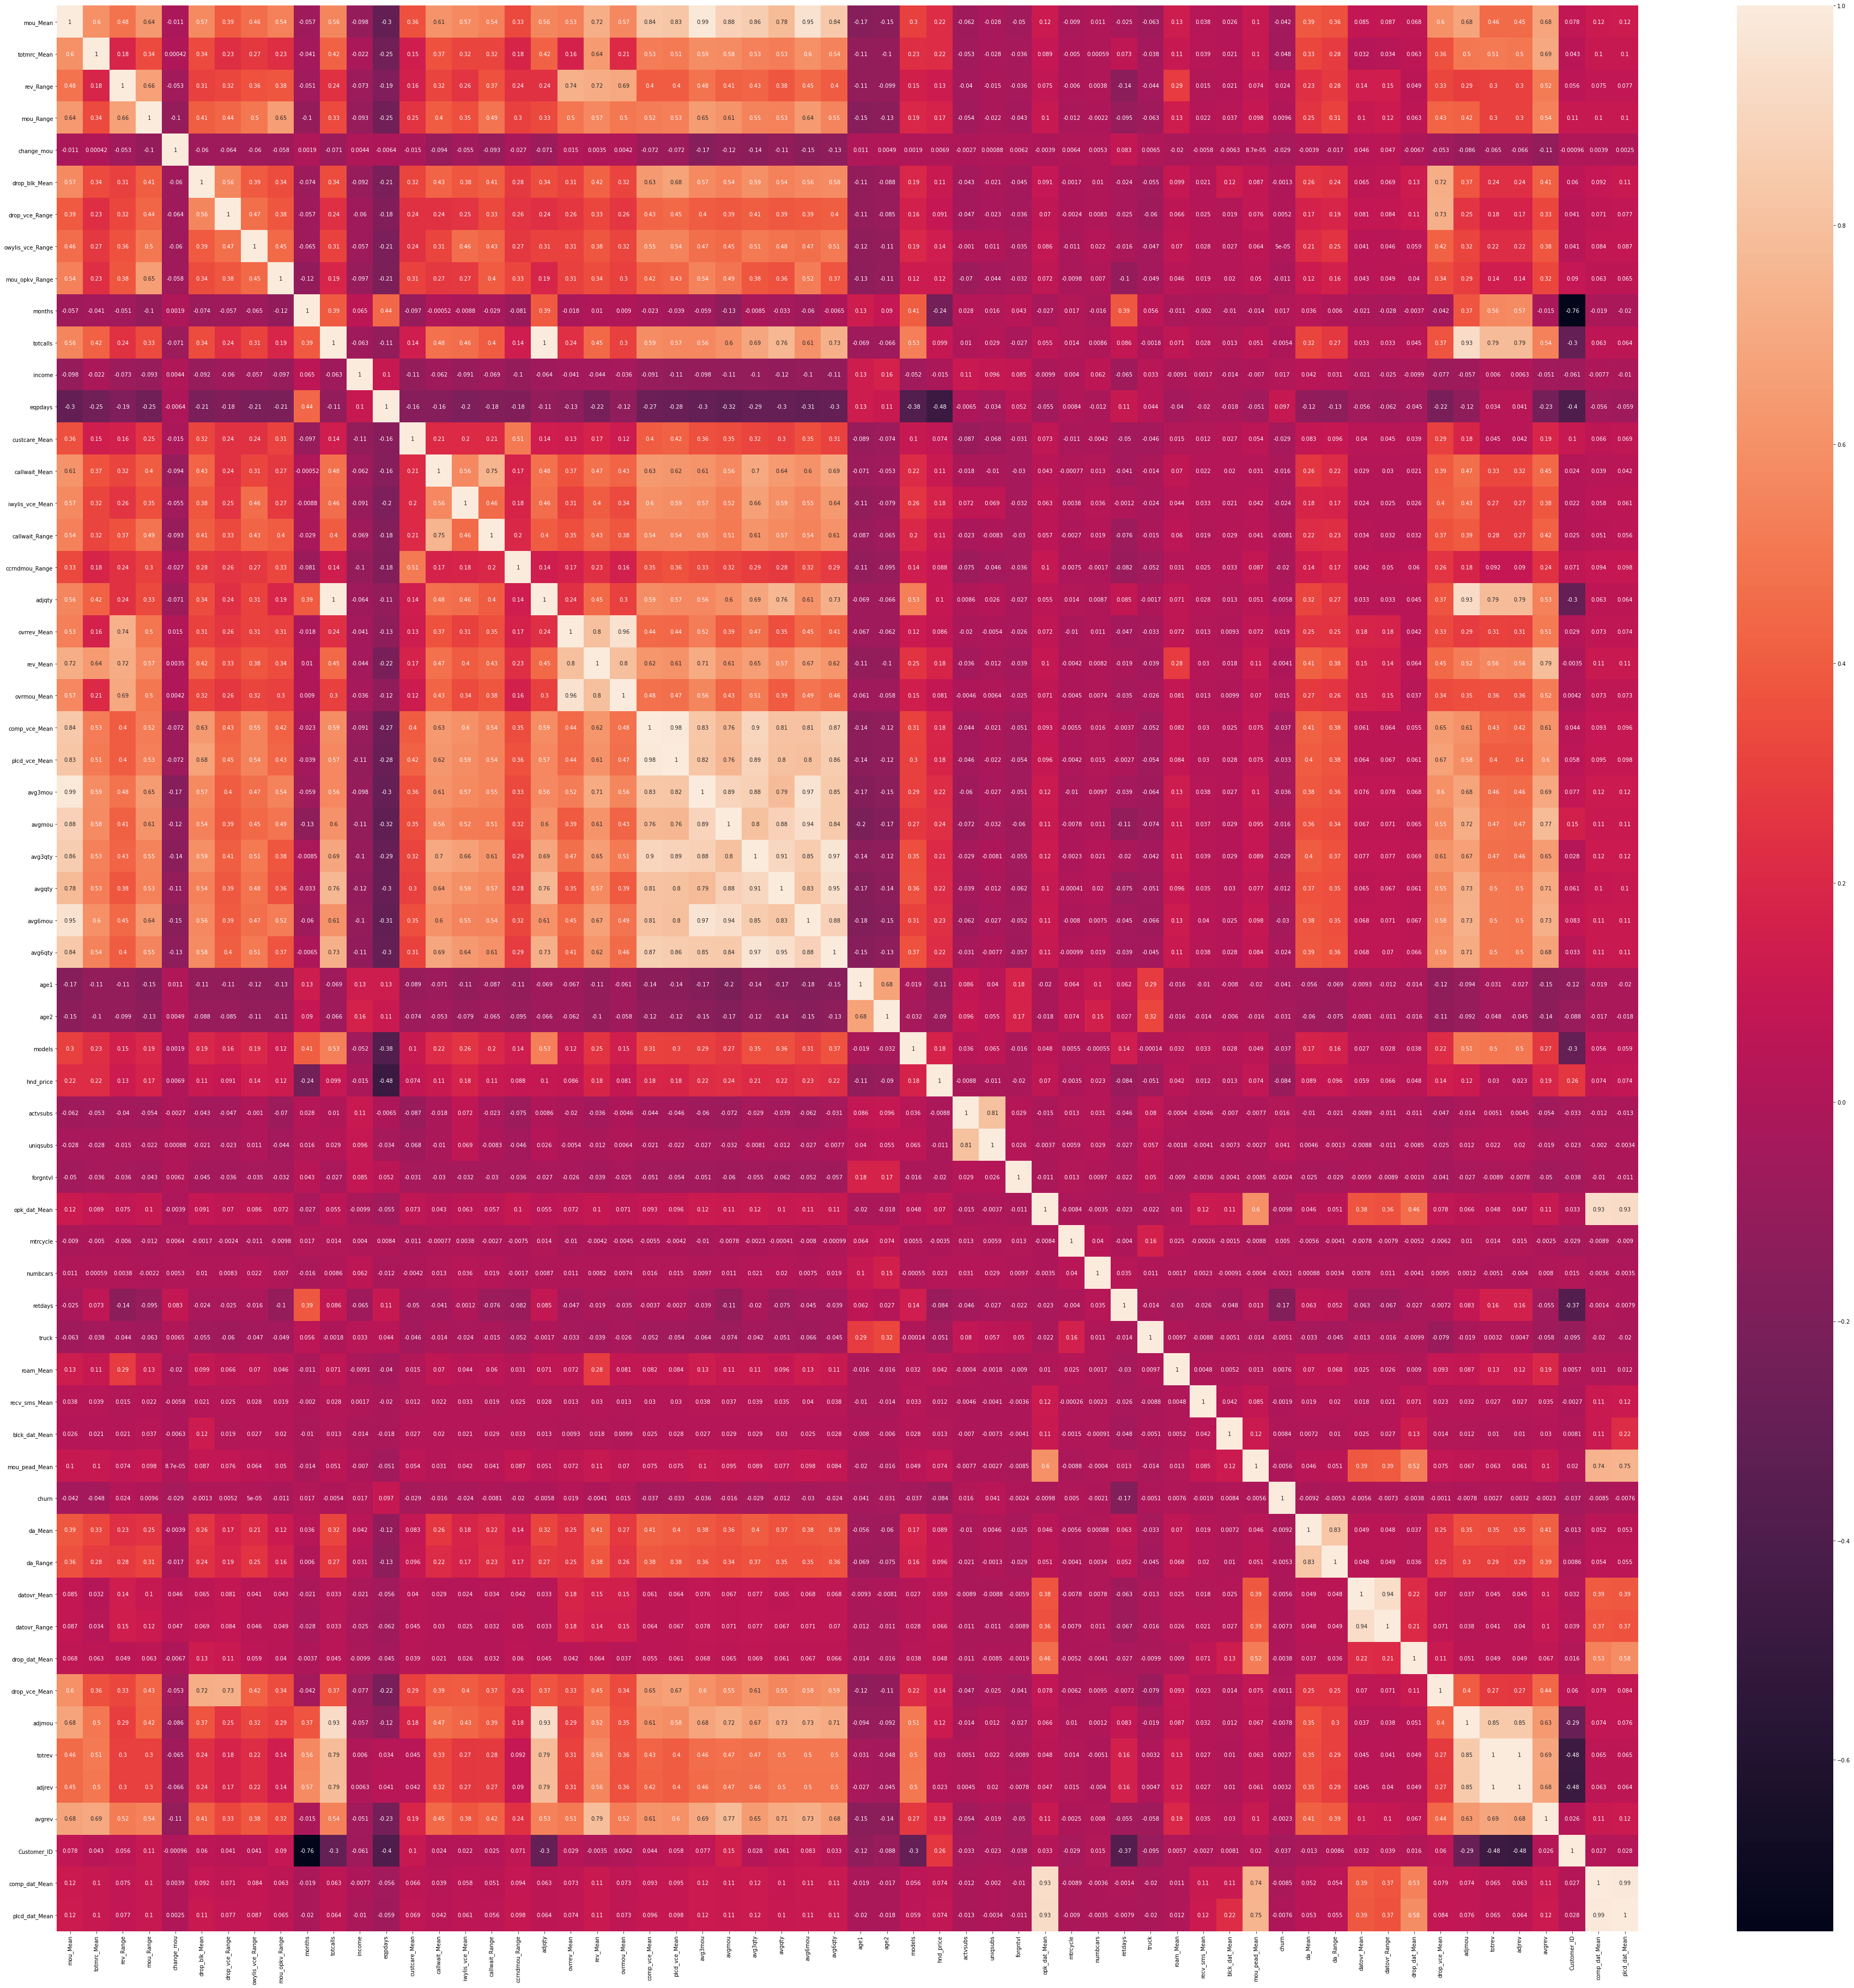

In [16]:
plt.figure(figsize=(65,65))
sns.heatmap(df.corr(), annot=True)

In [17]:
df.corr().to_csv('/content/drive/MyDrive/GL-DSBA-20-21/Capstone Project/file1.csv') 

###**Univariate Analysis**

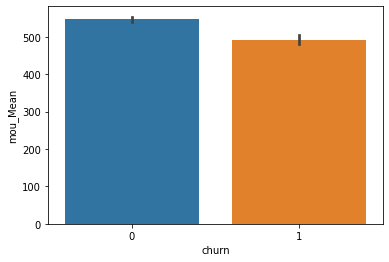

In [18]:
sns.barplot(y='mou_Mean', x='churn', data=df)



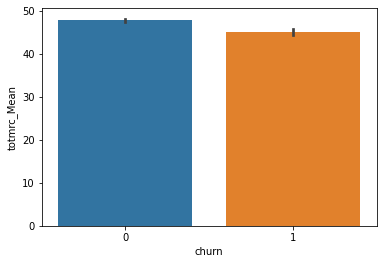

In [19]:
sns.barplot(y='totmrc_Mean', x='churn', data=df)


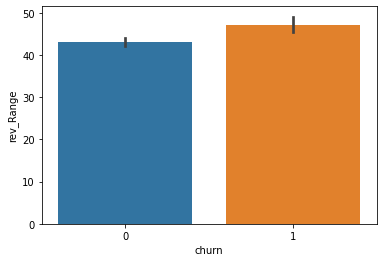

In [20]:
sns.barplot(y='rev_Range', x='churn', data=df)


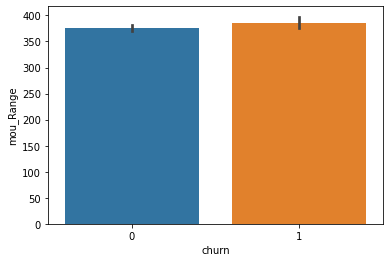

In [21]:
sns.barplot(y='mou_Range', x='churn', data=df)

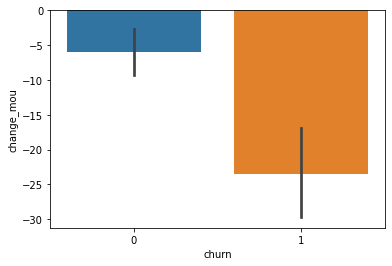

In [22]:
sns.barplot(y='change_mou', x='churn', data=df)

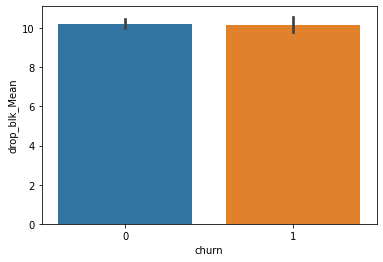

In [23]:
sns.barplot(y='drop_blk_Mean', x='churn', data=df)

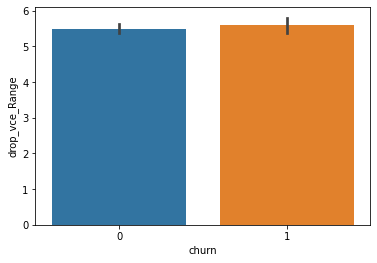

In [24]:
sns.barplot(y='drop_vce_Range', x='churn', data=df)

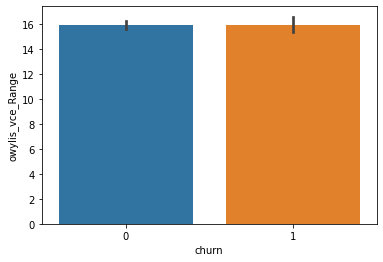

In [25]:
sns.barplot(y='owylis_vce_Range', x='churn', data=df)

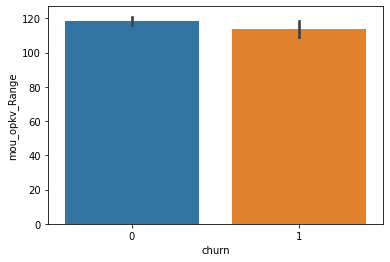

In [26]:
sns.barplot(y='mou_opkv_Range', x='churn', data=df)

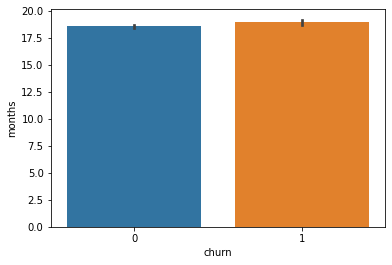

In [27]:
sns.barplot(y='months', x='churn', data=df)

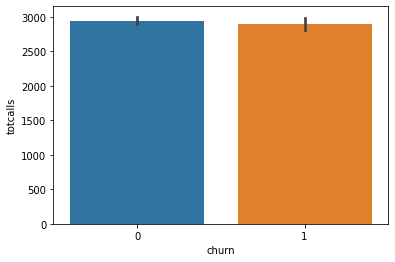

In [28]:
sns.barplot(y='totcalls', x='churn', data=df)

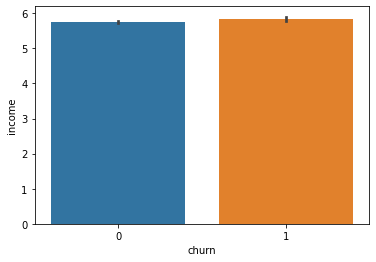

In [29]:
sns.barplot(y='income', x='churn', data=df)

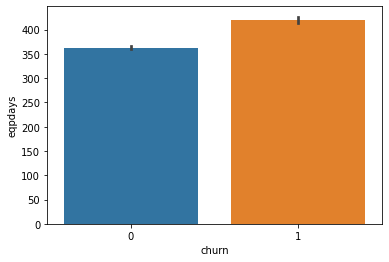

In [30]:
sns.barplot(y='eqpdays', x='churn', data=df)

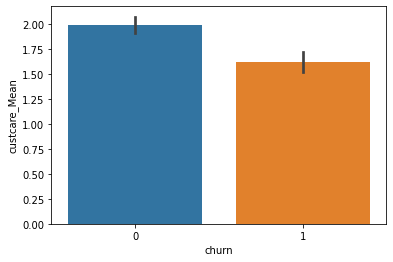

In [31]:
sns.barplot(y='custcare_Mean', x='churn', data=df)

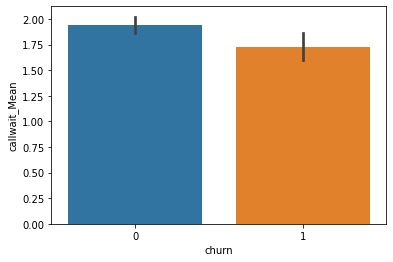

In [32]:
sns.barplot(y='callwait_Mean', x='churn', data=df)

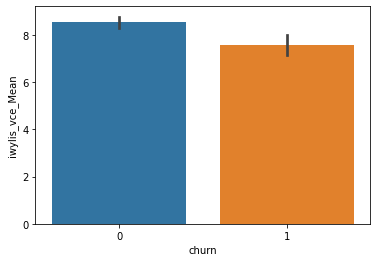

In [33]:
sns.barplot(y='iwylis_vce_Mean', x='churn', data=df)

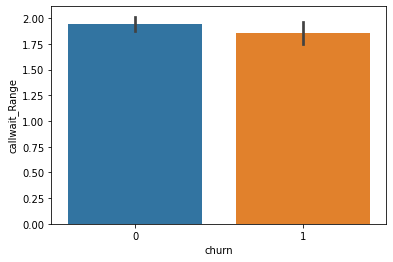

In [34]:
sns.barplot(y='callwait_Range', x='churn', data=df)

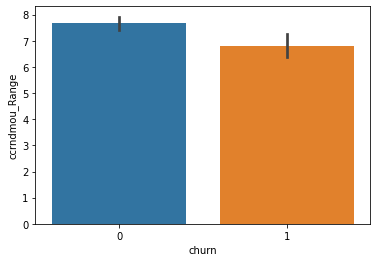

In [35]:
sns.barplot(y='ccrndmou_Range', x='churn', data=df)

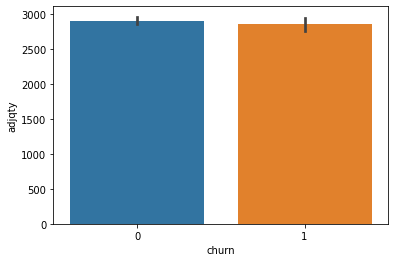

In [36]:
sns.barplot(y='adjqty', x='churn', data=df)

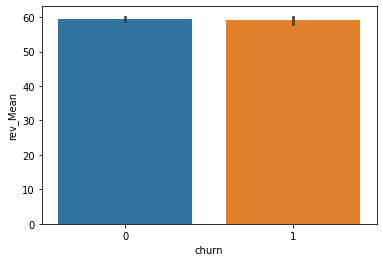

In [37]:
sns.barplot(y='rev_Mean', x='churn', data=df)

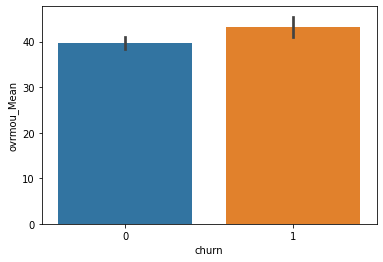

In [38]:
sns.barplot(y='ovrmou_Mean', x='churn', data=df)

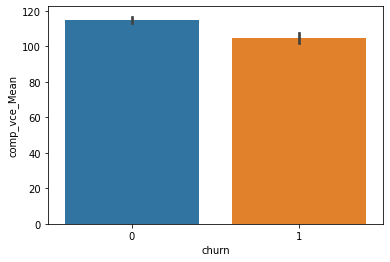

In [39]:
sns.barplot(y='comp_vce_Mean', x='churn', data=df)

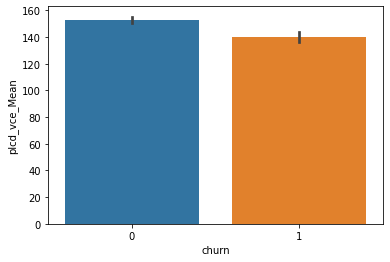

In [40]:
sns.barplot(y='plcd_vce_Mean', x='churn', data=df)

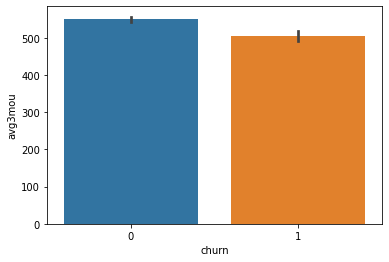

In [41]:
sns.barplot(y='avg3mou', x='churn', data=df)

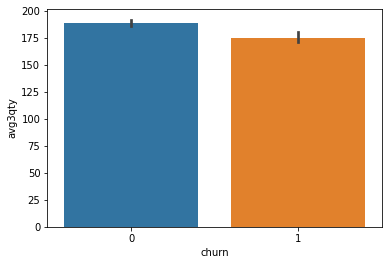

In [42]:
sns.barplot(y='avg3qty', x='churn', data=df)

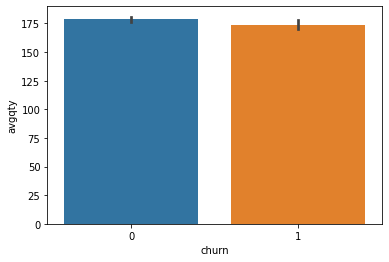

In [43]:
sns.barplot(y='avgqty', x='churn', data=df)

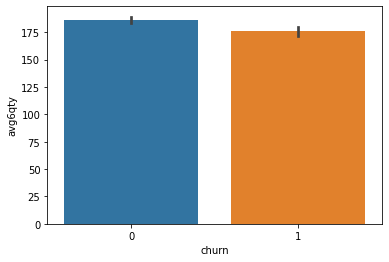

In [44]:
sns.barplot(y='avg6qty', x='churn', data=df)

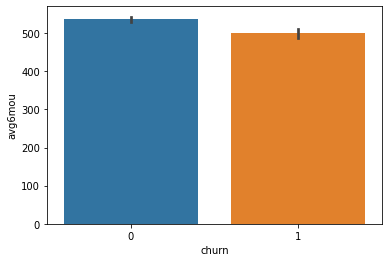

In [45]:
sns.barplot(y='avg6mou', x='churn', data=df)

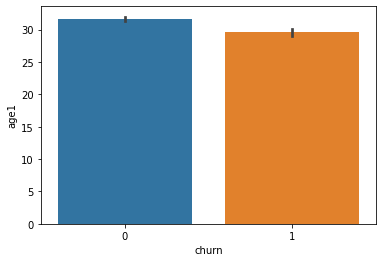

In [46]:
sns.barplot(y='age1', x='churn', data=df)

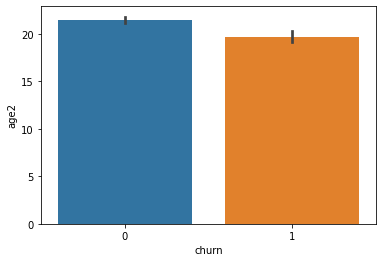

In [47]:
sns.barplot(y='age2', x='churn', data=df)

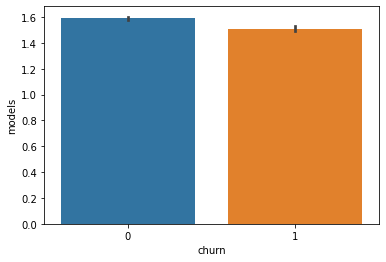

In [48]:
sns.barplot(y='models', x='churn', data=df)

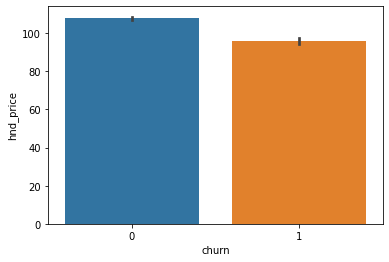

In [49]:
sns.barplot(y='hnd_price', x='churn', data=df)

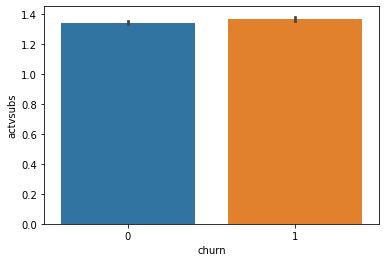

In [50]:
sns.barplot(y='actvsubs', x='churn', data=df)

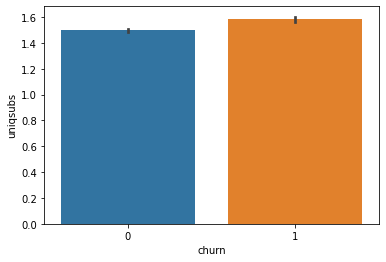

In [51]:
sns.barplot(y='uniqsubs', x='churn', data=df)

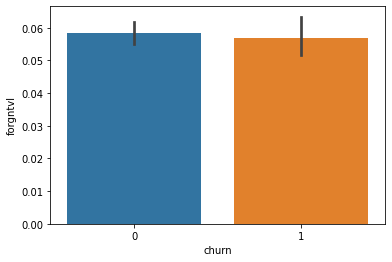

In [52]:
sns.barplot(y='forgntvl', x='churn', data=df)

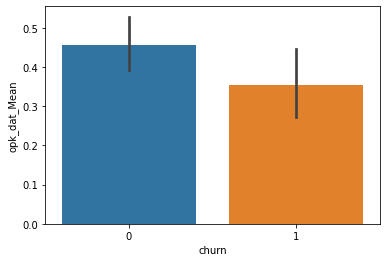

In [53]:
sns.barplot(y='opk_dat_Mean', x='churn', data=df)

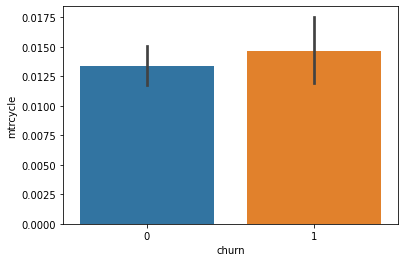

In [54]:
sns.barplot(y='mtrcycle', x='churn', data=df)

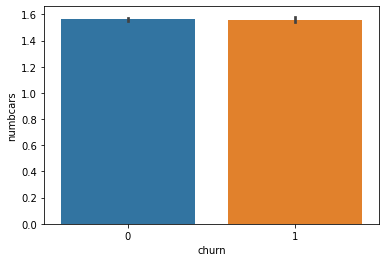

In [55]:
sns.barplot(y='numbcars', x='churn', data=df)

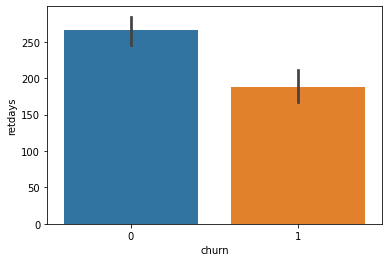

In [56]:
sns.barplot(y='retdays', x='churn', data=df)

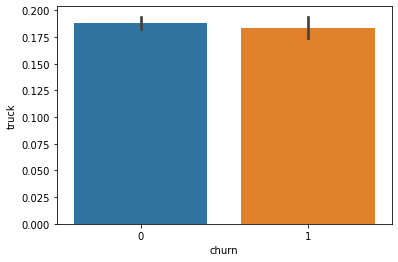

In [57]:
sns.barplot(y='truck', x='churn', data=df)

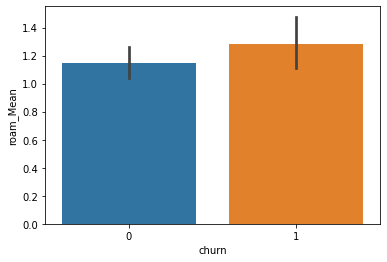

In [58]:
sns.barplot(y='roam_Mean', x='churn', data=df)

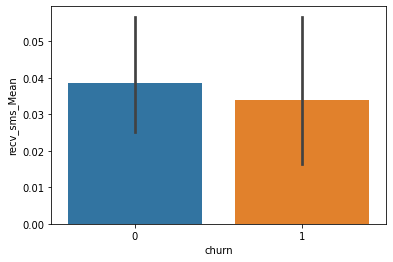

In [59]:
sns.barplot(y='recv_sms_Mean', x='churn', data=df)

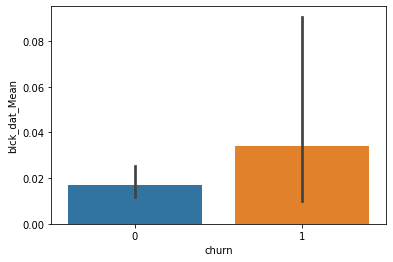

In [60]:
sns.barplot(y='blck_dat_Mean', x='churn', data=df)

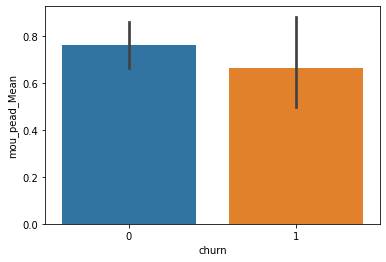

In [61]:
sns.barplot(y='mou_pead_Mean', x='churn', data=df)

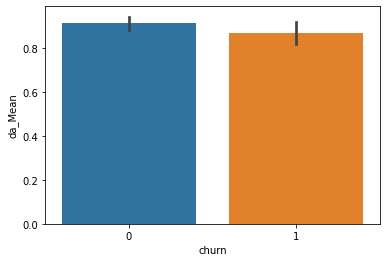

In [62]:
sns.barplot(y='da_Mean', x='churn', data=df)

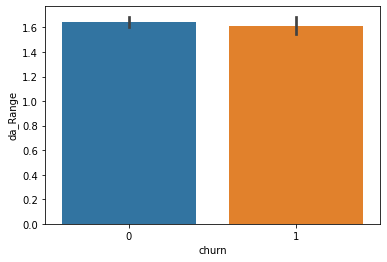

In [63]:
sns.barplot(y='da_Range', x='churn', data=df)

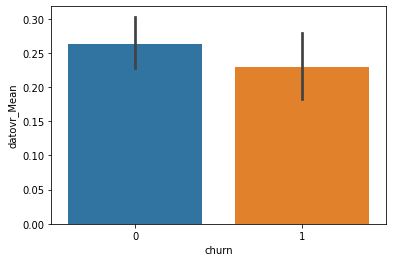

In [64]:
sns.barplot(y='datovr_Mean', x='churn', data=df)

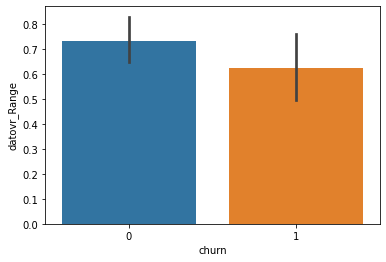

In [65]:
sns.barplot(y='datovr_Range', x='churn', data=df)

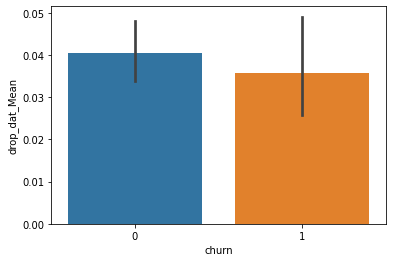

In [66]:
sns.barplot(y='drop_dat_Mean', x='churn', data=df)

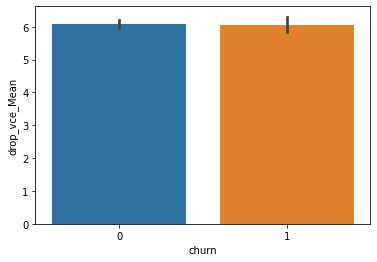

In [67]:
sns.barplot(y='drop_vce_Mean', x='churn', data=df)

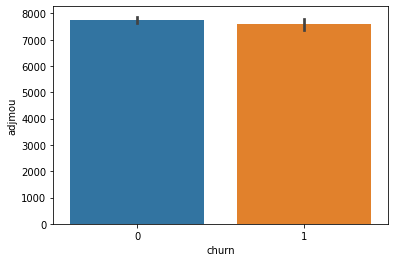

In [68]:
sns.barplot(y='adjmou', x='churn', data=df)

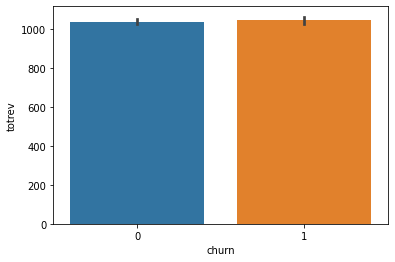

In [69]:
sns.barplot(y='totrev', x='churn', data=df)

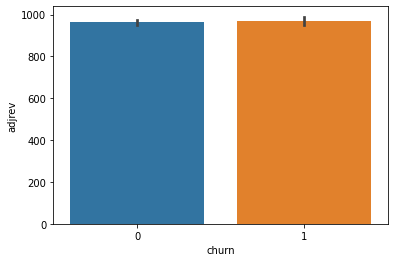

In [70]:
sns.barplot(y='adjrev', x='churn', data=df)

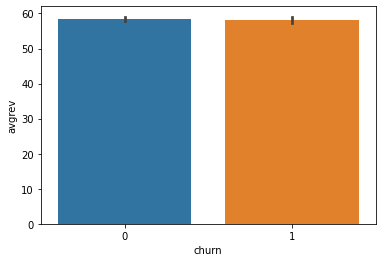

In [71]:
sns.barplot(y='avgrev', x='churn', data=df)

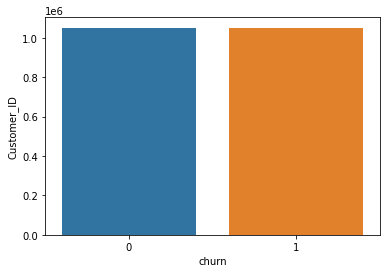

In [72]:
sns.barplot(y='Customer_ID', x='churn', data=df)

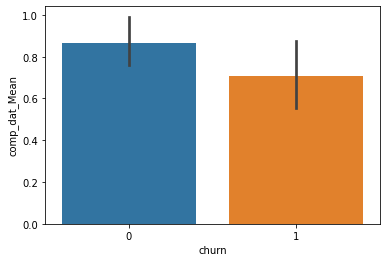

In [73]:
sns.barplot(y='comp_dat_Mean', x='churn', data=df)

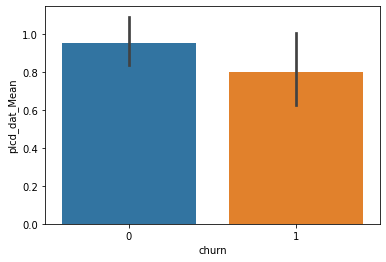

In [74]:
sns.barplot(y='plcd_dat_Mean', x='churn', data=df)

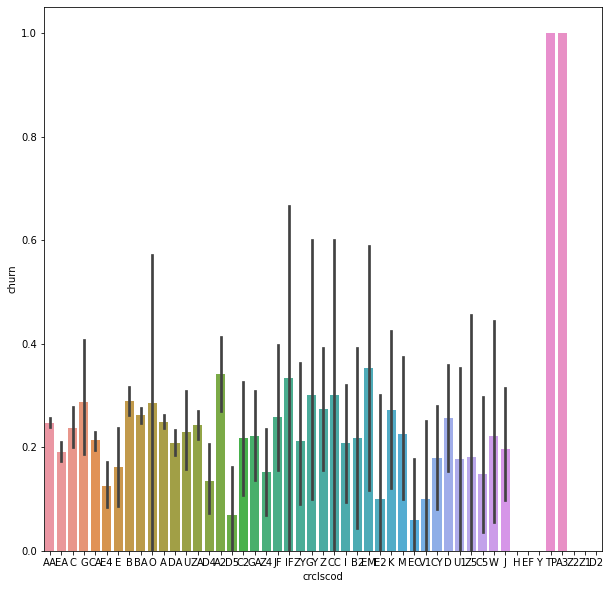

In [75]:
plt.figure(figsize=(10,10))
sns.barplot(x='crclscod', y='churn', data = df)


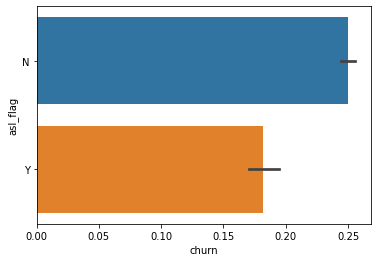

In [76]:
sns.barplot(y='asl_flag', x='churn', data=df)

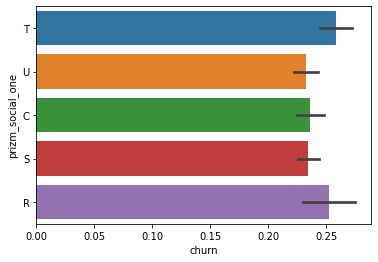

In [77]:
sns.barplot(y='prizm_social_one', x='churn', data=df)

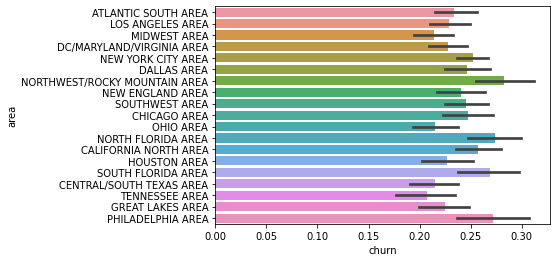

In [78]:
sns.barplot(y='area', x='churn', data=df)

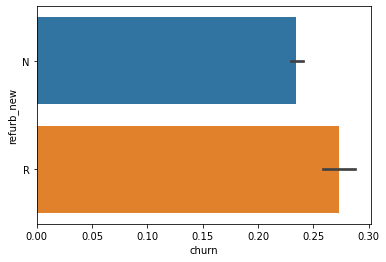

In [79]:
sns.barplot(y='refurb_new', x='churn', data=df)

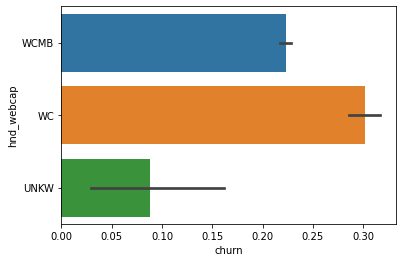

In [80]:
sns.barplot(y='hnd_webcap', x='churn', data=df)

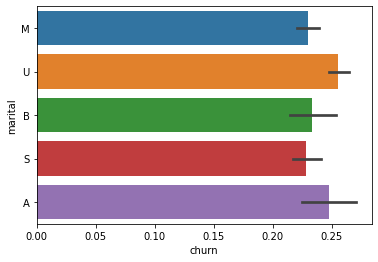

In [81]:
sns.barplot(y='marital', x='churn', data=df)

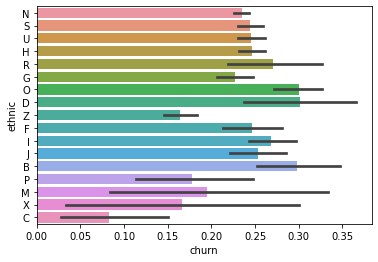

In [82]:
sns.barplot(y='ethnic', x='churn', data=df)

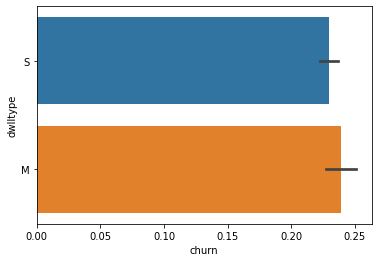

In [83]:
sns.barplot(y='dwlltype', x='churn', data=df)

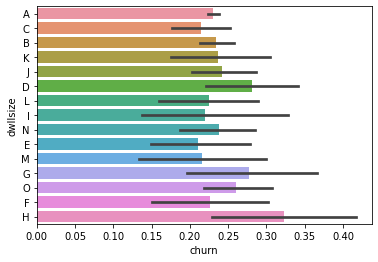

In [84]:
sns.barplot(y='dwllsize', x='churn', data=df)

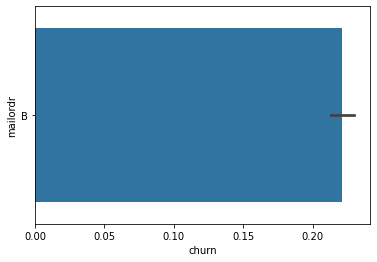

In [85]:
sns.barplot(y='mailordr', x='churn', data=df)

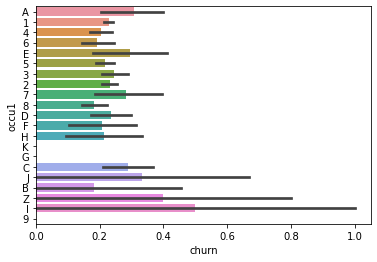

In [86]:
sns.barplot(y='occu1', x='churn', data=df)

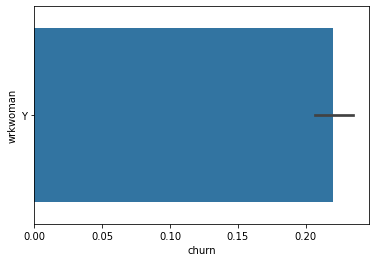

In [87]:
sns.barplot(y='wrkwoman', x='churn', data=df)

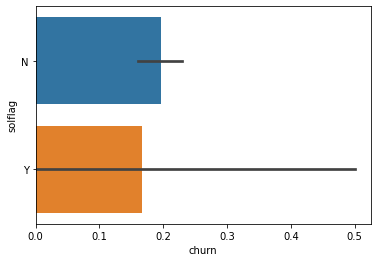

In [88]:
sns.barplot(y='solflag', x='churn', data=df)

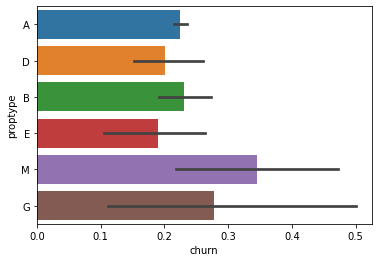

In [89]:
sns.barplot(y='proptype', x='churn', data=df)

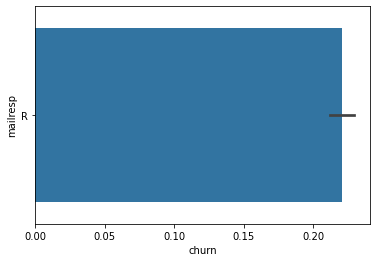

In [90]:
sns.barplot(y='mailresp', x='churn', data=df)

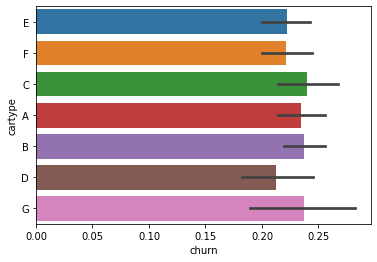

In [91]:
sns.barplot(y='cartype', x='churn', data=df)

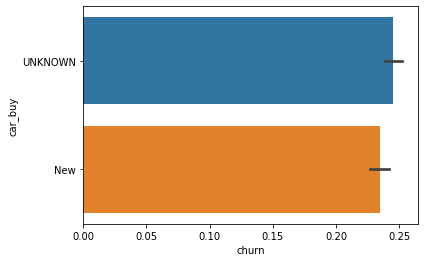

In [92]:
sns.barplot(y='car_buy', x='churn', data=df)

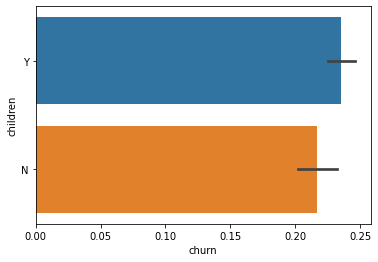

In [93]:
sns.barplot(y='children', x='churn', data=df)

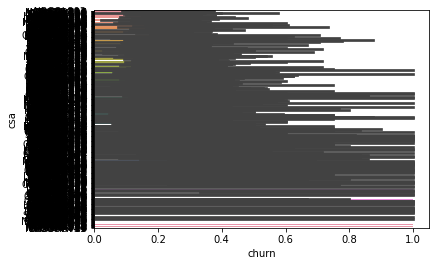

In [94]:
sns.barplot(y='csa', x='churn', data=df)

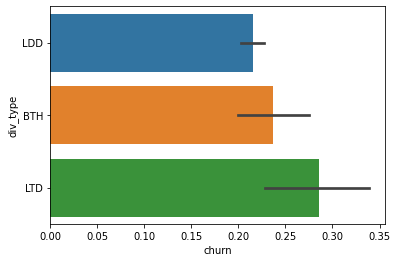

In [95]:
sns.barplot(y='div_type', x='churn', data=df)

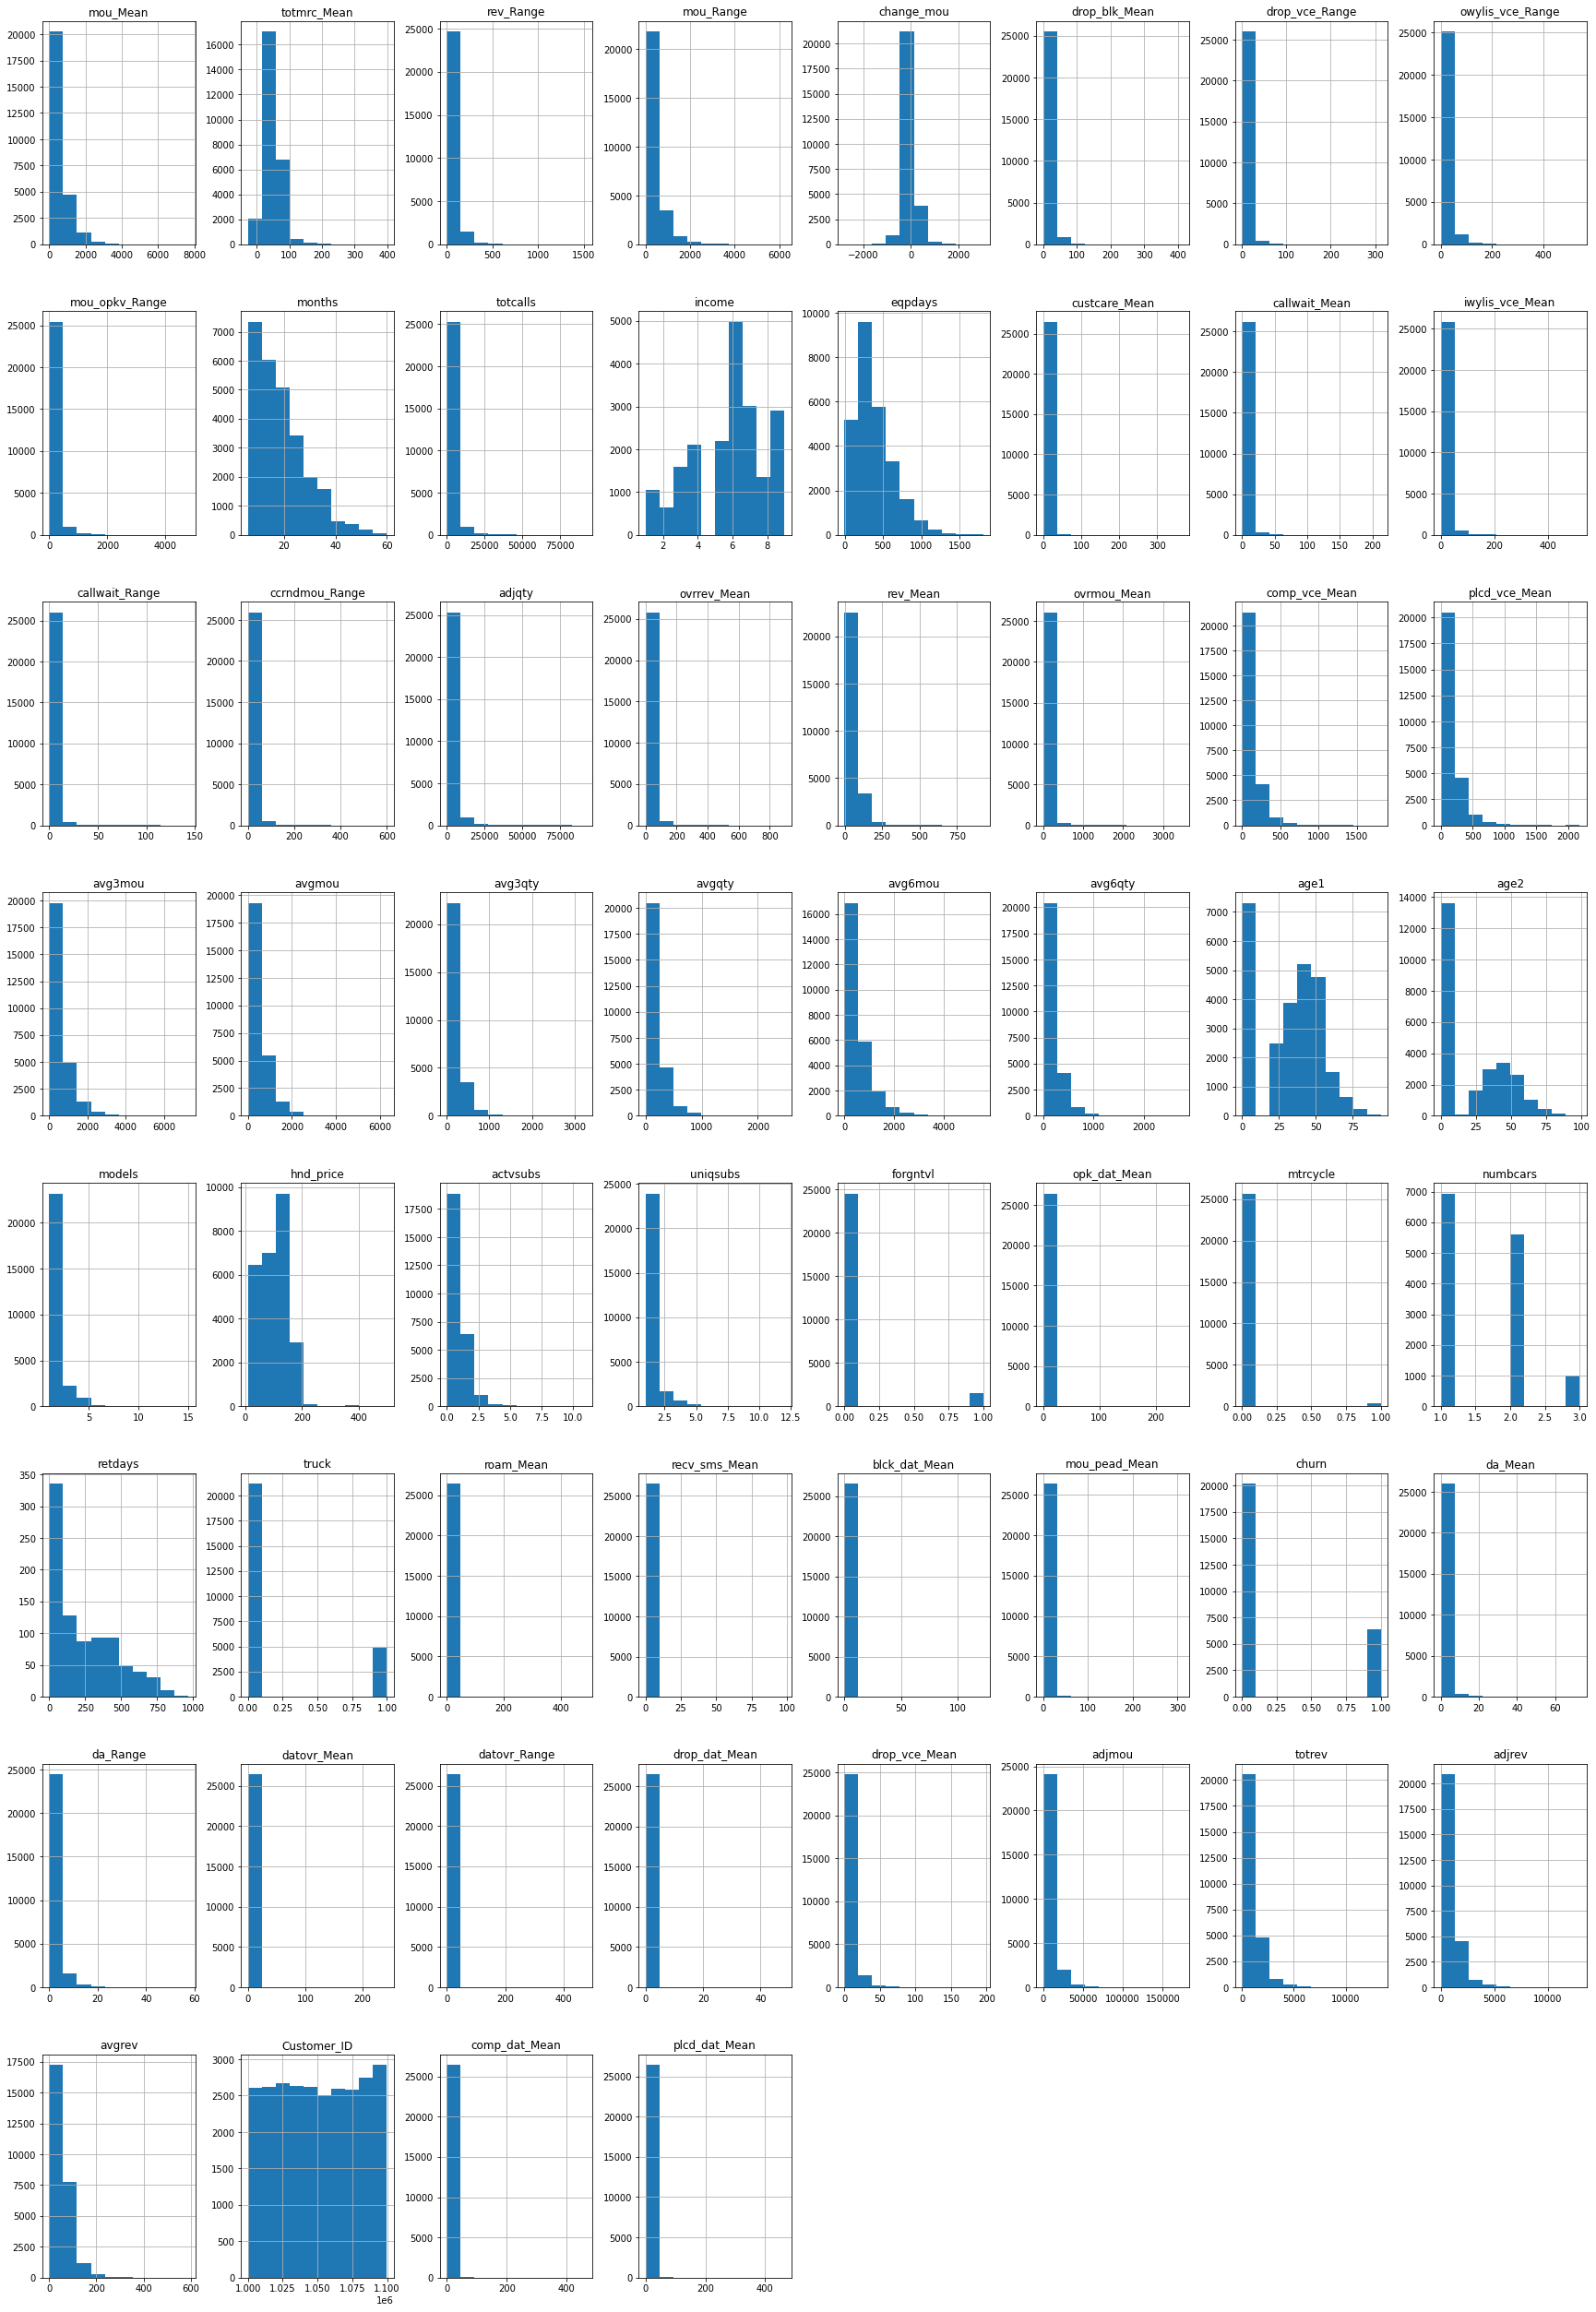

In [96]:
df.iloc[:,:].hist(figsize=(30,45))
plt.show()

In [97]:
df['churn'].value_counts(normalize=True)

0    0.760012
1    0.239988
Name: churn, dtype: float64

###**Missing Value Treatement**

In [98]:
cols = ['csa', 'area', 'marital', 'ethnic', 'car_buy']
for column in cols:
    df[column].fillna(df[column].mode()[0], inplace=True) 

    
df.isnull().sum()


mou_Mean          58
totmrc_Mean       58
rev_Range         58
mou_Range         58
change_mou       161
                ... 
adjrev             0
avgrev             0
Customer_ID        0
comp_dat_Mean      0
plcd_dat_Mean      0
Length: 81, dtype: int64

In [99]:
from sklearn.impute import SimpleImputer
SI = SimpleImputer(strategy='median')

In [100]:
colmns = ['datovr_Range', 'da_Range','da_Mean','mou_Range','rev_Range','totmrc_Mean','roam_Mean','datovr_Mean','mou_Mean','ovrrev_Mean','ovrmou_Mean','rev_Mean','change_mou','hnd_price','age1','age2','mtrcycle','truck','forgntvl','avg6qty', 'avg6mou']
for i in colmns:
 df.loc[df.loc[:,i].isnull(),i]=df.loc[:,i].median()
 
df.isnull().sum()


mou_Mean         0
totmrc_Mean      0
rev_Range        0
mou_Range        0
change_mou       0
                ..
adjrev           0
avgrev           0
Customer_ID      0
comp_dat_Mean    0
plcd_dat_Mean    0
Length: 81, dtype: int64

In [101]:
df['prizm_social_one'] = df['prizm_social_one'].replace(np.nan, 'X')
df['hnd_webcap'] = df['hnd_webcap'].replace(np.nan, 'UNKW')
df['dwlltype'] = df['dwlltype'].replace(np.nan, 'U')
df['dwllsize'] = df['dwllsize'].replace(np.nan, 'U')

In [102]:
df['income'].interpolate(method='pad', inplace = True)

In [103]:
is_null_after = df.isnull().sum().sort_values(ascending = False)
is_null_after.head(12)

solflag          26003
retdays          25652
wrkwoman         23246
div_type         21501
occu1            19488
proptype         18987
cartype          17955
children         17562
mailordr         17010
mailresp         16622
numbcars         12959
plcd_dat_Mean        0
dtype: int64

###**Dropping Variables**

In [104]:
df_tel=df.copy()
df_tel.head()

,mou_Mean,totmrc_Mean,rev_Range,mou_Range,change_mou,drop_blk_Mean,drop_vce_Range,owylis_vce_Range,mou_opkv_Range,months,totcalls,income,eqpdays,custcare_Mean,callwait_Mean,iwylis_vce_Mean,callwait_Range,ccrndmou_Range,adjqty,ovrrev_Mean,rev_Mean,ovrmou_Mean,comp_vce_Mean,plcd_vce_Mean,avg3mou,avgmou,avg3qty,avgqty,avg6mou,avg6qty,crclscod,asl_flag,prizm_social_one,area,refurb_new,hnd_webcap,marital,ethnic,age1,age2,...,hnd_price,actvsubs,uniqsubs,forgntvl,dwlltype,dwllsize,mailordr,occu1,opk_dat_Mean,mtrcycle,numbcars,retdays,truck,wrkwoman,roam_Mean,recv_sms_Mean,blck_dat_Mean,mou_pead_Mean,churn,solflag,proptype,mailresp,cartype,car_buy,children,csa,da_Mean,da_Range,datovr_Mean,datovr_Range,div_type,drop_dat_Mean,drop_vce_Mean,adjmou,totrev,adjrev,avgrev,Customer_ID,comp_dat_Mean,plcd_dat_Mean
0,190.25,63.9400,26.00,43.0,-11.25,4.666667,8,20,28.44,14,1104,9.0,403,0.000000,0.666667,10.333333,2,0,1104,2.050,53.4900,5.50,59.333333,73.333333,194,182.77,91,84.92,211.0,99.0,AA,N,T,ATLANTIC SOUTH AREA,N,WCMB,M,N,36.0,0.0,...,199.98999,2,2,0.0,S,A,B,A,0.0,0.0,NaN,NaN,0.0,Y,0.0,0.0,0.0,0.000000,0,NaN,A,R,NaN,UNKNOWN,Y,AIRCOL803,0.0000,0.00,0.0000,0.00,NaN,0.0,3.666667,2376.0,519.07,489.08,37.62,1064525,0.000000,0.000000
1,443.00,39.9900,5.10,199.0,-78.00,4.333333,5,33,72.46,13,2237,9.0,404,1.333333,0.000000,16.333333,0,14,2230,8.840,34.3575,25.00,87.000000,104.333333,469,463.75,188,185.83,467.0,166.0,EA,N,U,LOS ANGELES AREA,N,WCMB,U,S,0.0,0.0,...,149.98999,1,1,0.0,U,U,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,0.0,0.0,0.0,0.883333,0,NaN,NaN,NaN,NaN,New,NaN,LAXCUL310,0.2475,0.99,0.8775,3.51,NaN,0.0,3.000000,5565.0,598.53,538.55,44.88,1048538,0.333333,0.333333
2,400.50,44.9900,13.88,172.0,-67.50,2.000000,1,7,93.60,29,3276,6.0,213,1.000000,0.000000,0.000000,0,28,3269,4.725,40.5350,13.50,124.666667,153.000000,423,291.33,134,121.07,333.0,118.0,C,N,C,MIDWEST AREA,N,WCMB,M,N,32.0,30.0,...,99.98999,1,1,0.0,S,A,B,NaN,0.0,0.0,1.0,NaN,0.0,NaN,0.0,0.0,0.0,0.000000,0,NaN,NaN,R,E,New,Y,STLSTL314,0.4950,1.98,0.0000,0.00,NaN,0.0,0.333333,7866.0,1616.71,1586.36,58.75,1010139,0.000000,0.333333
3,53.50,34.6675,18.56,78.0,12.50,1.333333,2,0,4.70,25,1932,8.0,757,4.666667,0.000000,0.000000,0,76,1924,9.300,38.7400,23.25,32.333333,43.000000,49,243.50,25,80.17,244.0,95.0,EA,N,U,LOS ANGELES AREA,N,WC,U,U,34.0,38.0,...,29.98999,1,1,0.0,U,U,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,0.0,0.0,0.0,0.000000,0,NaN,NaN,NaN,NaN,New,NaN,LAXANA714,0.0000,0.00,0.0000,0.00,LDD,0.0,0.666667,5844.0,1682.44,1647.63,68.65,1014496,0.000000,0.000000
4,37.00,21.0425,35.79,74.0,-33.00,5.666667,1,4,36.60,33,652,5.0,983,0.333333,0.000000,0.000000,0,4,636,0.000,21.0425,0.00,10.666667,18.000000,48,50.74,12,20.52,43.0,16.0,G,N,U,DC/MARYLAND/VIRGINIA AREA,N,UNKW,B,N,78.0,0.0,...,29.98999,1,1,0.0,U,U,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.000000,0,NaN,NaN,NaN,NaN,UNKNOWN,NaN,NCRGRB757,0.0000,0.00,0.0000,0.00,NaN,0.0,1.333333,1573.0,967.59,916.61,29.57,1012053,0.000000,0.000000


In [105]:
df_tel.drop(['solflag', 'retdays', 'wrkwoman', 'div_type', 'occu1', 'proptype', 'cartype', 'children', 'mailordr', 'mailresp', 'numbcars', 'Customer_ID'], axis=1, inplace = True)

In [106]:
df_tel.shape

(26518, 69)

###**Converting Categorical Data**

In [107]:
df_tel['csa'] = pd.Categorical(df_tel['csa']).codes
df_tel['crclscod'] = pd.Categorical(df_tel['crclscod']).codes

In [108]:
cat=[]
num=[]
for i in df_tel.columns:
    if df_tel[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['asl_flag', 'prizm_social_one', 'area', 'refurb_new', 'hnd_webcap', 'marital', 'ethnic', 'dwlltype', 'dwllsize', 'car_buy']
['mou_Mean', 'totmrc_Mean', 'rev_Range', 'mou_Range', 'change_mou', 'drop_blk_Mean', 'drop_vce_Range', 'owylis_vce_Range', 'mou_opkv_Range', 'months', 'totcalls', 'income', 'eqpdays', 'custcare_Mean', 'callwait_Mean', 'iwylis_vce_Mean', 'callwait_Range', 'ccrndmou_Range', 'adjqty', 'ovrrev_Mean', 'rev_Mean', 'ovrmou_Mean', 'comp_vce_Mean', 'plcd_vce_Mean', 'avg3mou', 'avgmou', 'avg3qty', 'avgqty', 'avg6mou', 'avg6qty', 'crclscod', 'age1', 'age2', 'models', 'hnd_price', 'actvsubs', 'uniqsubs', 'forgntvl', 'opk_dat_Mean', 'mtrcycle', 'truck', 'roam_Mean', 'recv_sms_Mean', 'blck_dat_Mean', 'mou_pead_Mean', 'churn', 'csa', 'da_Mean', 'da_Range', 'datovr_Mean', 'datovr_Range', 'drop_dat_Mean', 'drop_vce_Mean', 'adjmou', 'totrev', 'adjrev', 'avgrev', 'comp_dat_Mean', 'plcd_dat_Mean']


In [109]:
df_tel =pd.get_dummies(df_tel, columns=cat,drop_first=True)

In [110]:
df_tel.head()

,mou_Mean,totmrc_Mean,rev_Range,mou_Range,change_mou,drop_blk_Mean,drop_vce_Range,owylis_vce_Range,mou_opkv_Range,months,totcalls,income,eqpdays,custcare_Mean,callwait_Mean,iwylis_vce_Mean,callwait_Range,ccrndmou_Range,adjqty,ovrrev_Mean,rev_Mean,ovrmou_Mean,comp_vce_Mean,plcd_vce_Mean,avg3mou,avgmou,avg3qty,avgqty,avg6mou,avg6qty,crclscod,age1,age2,models,hnd_price,actvsubs,uniqsubs,forgntvl,opk_dat_Mean,mtrcycle,...,hnd_webcap_WC,hnd_webcap_WCMB,marital_B,marital_M,marital_S,marital_U,ethnic_C,ethnic_D,ethnic_F,ethnic_G,ethnic_H,ethnic_I,ethnic_J,ethnic_M,ethnic_N,ethnic_O,ethnic_P,ethnic_R,ethnic_S,ethnic_U,ethnic_X,ethnic_Z,dwlltype_S,dwlltype_U,dwllsize_B,dwllsize_C,dwllsize_D,dwllsize_E,dwllsize_F,dwllsize_G,dwllsize_H,dwllsize_I,dwllsize_J,dwllsize_K,dwllsize_L,dwllsize_M,dwllsize_N,dwllsize_O,dwllsize_U,car_buy_UNKNOWN
0,190.25,63.9400,26.00,43.0,-11.25,4.666667,8,20,28.44,14,1104,9.0,403,0.000000,0.666667,10.333333,2,0,1104,2.050,53.4900,5.50,59.333333,73.333333,194,182.77,91,84.92,211.0,99.0,3,36.0,0.0,1,199.98999,2,2,0.0,0.0,0.0,...,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,443.00,39.9900,5.10,199.0,-78.00,4.333333,5,33,72.46,13,2237,9.0,404,1.333333,0.000000,16.333333,0,14,2230,8.840,34.3575,25.00,87.000000,104.333333,469,463.75,188,185.83,467.0,166.0,21,0.0,0.0,1,149.98999,1,1,0.0,0.0,0.0,...,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,400.50,44.9900,13.88,172.0,-67.50,2.000000,1,7,93.60,29,3276,6.0,213,1.000000,0.000000,0.000000,0,28,3269,4.725,40.5350,13.50,124.666667,153.000000,423,291.33,134,121.07,333.0,118.0,7,32.0,30.0,2,99.98999,1,1,0.0,0.0,0.0,...,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,53.50,34.6675,18.56,78.0,12.50,1.333333,2,0,4.70,25,1932,8.0,757,4.666667,0.000000,0.000000,0,76,1924,9.300,38.7400,23.25,32.333333,43.000000,49,243.50,25,80.17,244.0,95.0,21,34.0,38.0,1,29.98999,1,1,0.0,0.0,0.0,...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,37.00,21.0425,35.79,74.0,-33.00,5.666667,1,4,36.60,33,652,5.0,983,0.333333,0.000000,0.000000,0,4,636,0.000,21.0425,0.00,10.666667,18.000000,48,50.74,12,20.52,43.0,16.0,25,78.0,0.0,1,29.98999,1,1,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [111]:
df_tel.describe()

,mou_Mean,totmrc_Mean,rev_Range,mou_Range,change_mou,drop_blk_Mean,drop_vce_Range,owylis_vce_Range,mou_opkv_Range,months,totcalls,income,eqpdays,custcare_Mean,callwait_Mean,iwylis_vce_Mean,callwait_Range,ccrndmou_Range,adjqty,ovrrev_Mean,rev_Mean,ovrmou_Mean,comp_vce_Mean,plcd_vce_Mean,avg3mou,avgmou,avg3qty,avgqty,avg6mou,avg6qty,crclscod,age1,age2,models,hnd_price,actvsubs,uniqsubs,forgntvl,opk_dat_Mean,mtrcycle,...,hnd_webcap_WC,hnd_webcap_WCMB,marital_B,marital_M,marital_S,marital_U,ethnic_C,ethnic_D,ethnic_F,ethnic_G,ethnic_H,ethnic_I,ethnic_J,ethnic_M,ethnic_N,ethnic_O,ethnic_P,ethnic_R,ethnic_S,ethnic_U,ethnic_X,ethnic_Z,dwlltype_S,dwlltype_U,dwllsize_B,dwllsize_C,dwllsize_D,dwllsize_E,dwllsize_F,dwllsize_G,dwllsize_H,dwllsize_I,dwllsize_J,dwllsize_K,dwllsize_L,dwllsize_M,dwllsize_N,dwllsize_O,dwllsize_U,car_buy_UNKNOWN
count,26518.000000,26518.000000,26518.000000,26518.000000,26518.000000,26518.000000,26518.000000,26518.000000,26518.000000,26518.000000,26518.000000,26518.000000,26518.000000,26518.000000,26518.000000,26518.000000,26518.000000,26518.000000,26518.000000,26518.000000,26518.000000,26518.000000,26518.000000,26518.000000,26518.000000,26518.000000,26518.000000,26518.000000,26518.000000,26518.000000,26518.000000,26518.000000,26518.000000,26518.000000,26518.000000,26518.000000,26518.000000,26518.000000,26518.000000,26518.000000,...,26518.000000,26518.000000,26518.000000,26518.000000,26518.000000,26518.000000,26518.000000,26518.000000,26518.000000,26518.000000,26518.000000,26518.000000,26518.000000,26518.000000,26518.000000,26518.000000,26518.000000,26518.000000,26518.000000,26518.000000,26518.000000,26518.000000,26518.000000,26518.000000,26518.000000,26518.000000,26518.000000,26518.000000,26518.000000,26518.000000,26518.00000,26518.000000,26518.000000,26518.000000,26518.000000,26518.000000,26518.000000,26518.000000,26518.000000,26518.000000
mean,533.217225,47.184247,44.070555,378.455068,-10.177620,10.220366,5.519534,15.904895,117.415913,18.693114,2936.164228,5.775926,376.450072,1.903424,1.892689,8.306936,1.923938,7.453315,2895.653971,13.290586,59.334201,40.397700,112.586935,149.803781,538.477977,493.945391,185.868580,177.225857,522.353911,182.113923,8.213666,31.248360,20.690135,1.569462,104.902880,1.349348,1.519798,0.056980,0.431669,0.013425,...,0.128516,0.779093,0.070895,0.307678,0.182103,0.388001,0.002753,0.008259,0.021382,0.059733,0.132438,0.036390,0.027114,0.001358,0.353722,0.037974,0.005317,0.009465,0.128856,0.110868,0.001131,0.050230,0.489026,0.316049,0.050833,0.015838,0.007504,0.005543,0.003997,0.004224,0.00362,0.002753,0.014481,0.006675,0.005883,0.003658,0.010446,0.011879,0.380496,0.583264
std,540.646949,24.237972,71.756366,428.465278,254.426742,15.500170,8.827681,23.611921,181.438026,9.736302,4006.455522,2.195833,251.967184,5.488562,5.754285,16.669723,4.637013,18.445158,3971.453473,30.204644,44.603406,98.072169,121.065609,162.082729,549.295120,451.311277,198.642909,174.079887,506.963593,186.988106,10.675859,21.946816,23.968999,0.910224,60.031464,0.627512,0.841855,0.231809,4.407282,0.115087,...,0.334670,0.414865,0.256655,0.461541,0.385936,0.487304,0.052396,0.090502,0.144656,0.236996,0.338973,0.187263,0.162418,0.036821,0.478133,0.191137,0.072726,0.096830,0.335047,0.313975,0.033617,0.218423,0.499889,0.464941,0.219662,0.124852,0.086304,0.074249,0.063099,0.064853,0.06006,0.052396,0.119464,0.081427,0.076475,0.060371,0.101671,0.108342,0.485518,0.493028
min,0.000000,-26.915000,0.000000,0.000000,-2785.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,1.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.520000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,9.989998,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

###**Outlier Treatment**

In [112]:
cont=df_tel.dtypes[(df_tel.dtypes!='uint8') & (df_tel.dtypes!='bool')].index


In [113]:
conty=cont.drop(['churn'])


Text(0.5, 1.0, 'With Outliers')

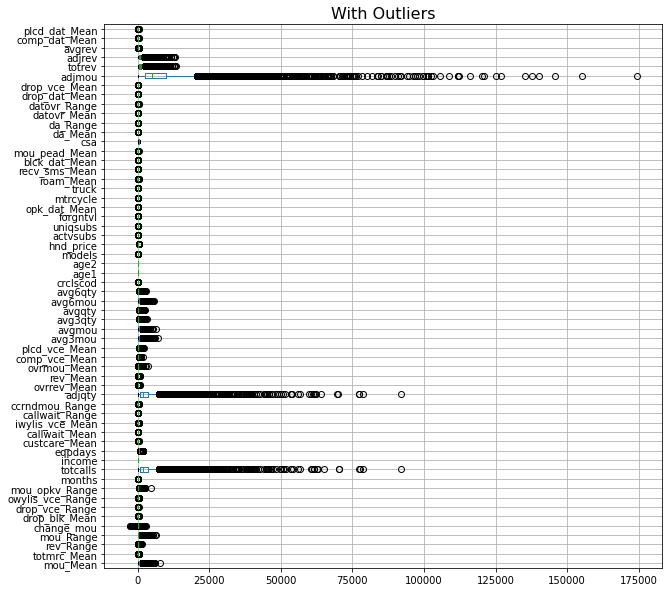

In [114]:
plt.figure(figsize=(10,10))
df_tel[conty].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)

In [115]:
  def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range 

In [116]:
for column in df_tel[conty].columns:
    lr,ur=remove_outlier(df_tel[column])
    df_tel[column]=np.where(df_tel[column]>ur,ur,df_tel[column])
    df_tel[column]=np.where(df_tel[column]<lr,lr,df_tel[column])

Text(0.5, 1.0, 'After Outlier Removal')

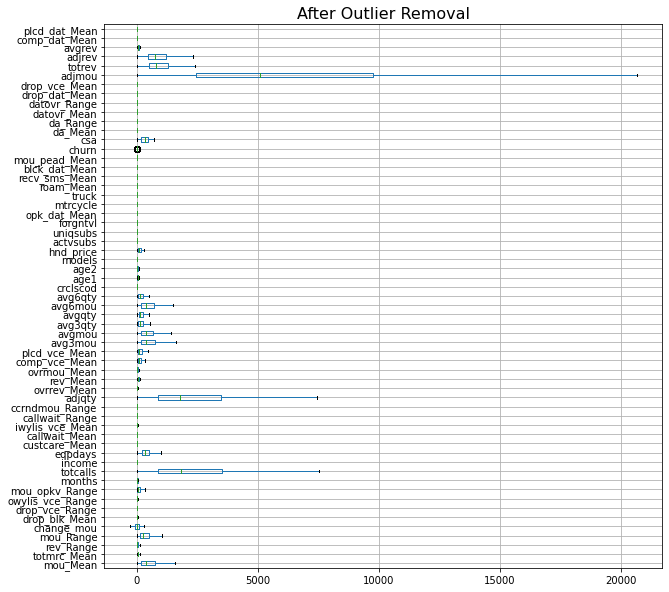

In [117]:
plt.figure(figsize=(10,10))
df_tel[cont].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)

###**Duplicates**

In [118]:
dups = df_tel.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [119]:
  print('Before',df_tel.shape)
  df_tel.drop_duplicates(inplace=True) 
  print('After',df_tel.shape)

Before (26518, 124)
After (26518, 124)


###**Balanced Data**

In [120]:
df_tel['churn'].describe()

count    26518.000000
mean         0.239988
std          0.427084
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: churn, dtype: float64

In [121]:
df_tel['churn'].value_counts(normalize=True)

0    0.760012
1    0.239988
Name: churn, dtype: float64

###**Clustering**

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
X = StandardScaler()
scaled_df = X.fit_transform(df_tel)
scaled_df = pd.DataFrame(scaled_df, index=df_tel.index, columns=df_tel.columns)
scaled_df.head()

,mou_Mean,totmrc_Mean,rev_Range,mou_Range,change_mou,drop_blk_Mean,drop_vce_Range,owylis_vce_Range,mou_opkv_Range,months,totcalls,income,eqpdays,custcare_Mean,callwait_Mean,iwylis_vce_Mean,callwait_Range,ccrndmou_Range,adjqty,ovrrev_Mean,rev_Mean,ovrmou_Mean,comp_vce_Mean,plcd_vce_Mean,avg3mou,avgmou,avg3qty,avgqty,avg6mou,avg6qty,crclscod,age1,age2,models,hnd_price,actvsubs,uniqsubs,forgntvl,opk_dat_Mean,mtrcycle,...,hnd_webcap_WC,hnd_webcap_WCMB,marital_B,marital_M,marital_S,marital_U,ethnic_C,ethnic_D,ethnic_F,ethnic_G,ethnic_H,ethnic_I,ethnic_J,ethnic_M,ethnic_N,ethnic_O,ethnic_P,ethnic_R,ethnic_S,ethnic_U,ethnic_X,ethnic_Z,dwlltype_S,dwlltype_U,dwllsize_B,dwllsize_C,dwllsize_D,dwllsize_E,dwllsize_F,dwllsize_G,dwllsize_H,dwllsize_I,dwllsize_J,dwllsize_K,dwllsize_L,dwllsize_M,dwllsize_N,dwllsize_O,dwllsize_U,car_buy_UNKNOWN
0,-0.711233,0.809755,-0.244462,-1.005790,-0.016766,-0.450052,0.714502,0.477315,-0.655093,-0.488474,-0.657008,1.468297,0.131634,-0.681023,-0.235675,0.545755,0.422496,-0.674815,-0.647016,-0.531791,-0.077110,-0.544851,-0.484016,-0.526663,-0.701860,-0.764702,-0.550250,-0.614517,-0.684341,-0.506229,-0.562969,0.216511,-0.863220,-0.695047,1.626499,1.130496,0.723956,0.0,0.0,0.0,...,-0.384016,0.532488,-0.276233,1.500051,-0.471855,-0.796234,-0.05254,-0.091254,-0.147814,-0.252047,-0.390712,-0.194331,-0.166941,-0.03687,1.351695,-0.198679,-0.073113,-0.097753,-0.384598,-0.353118,-0.033654,-0.229971,1.022194,-0.679775,-0.231421,-0.126859,-0.086954,-0.074661,-0.063351,-0.065126,-0.060277,-0.05254,-0.121217,-0.081973,-0.076926,-0.060591,-0.102742,-0.109643,-0.783706,0.845274
1,-0.139038,-0.304964,-0.710040,-0.479721,-0.465732,-0.488336,0.082993,1.417066,-0.229724,-0.595486,-0.133321,1.468297,0.135848,0.190779,-0.692763,1.310194,-0.746083,1.532485,-0.120607,0.011389,-0.698229,-0.011565,-0.194174,-0.281194,-0.088709,-0.023022,0.105686,0.150712,-0.066251,-0.021711,2.004338,-1.423849,-0.863220,-0.695047,0.774155,-0.582756,-0.681503,0.0,0.0,0.0,...,-0.384016,0.532488,-0.276233,-0.666644,-0.471855,1.255912,-0.05254,-0.091254,-0.147814,-0.252047,-0.390712,-0.194331,-0.166941,-0.03687,-0.739812,-0.198679,-0.073113,-0.097753,2.600117,-0.353118,-0.033654,-0.229971,-0.978288,1.471075,-0.231421,-0.126859,-0.086954,-0.074661,-0.063351,-0.065126,-0.060277,-0.05254,-0.121217,-0.081973,-0.076926,-0.060591,-0.102742,-0.109643,1.275989,-1.183048
2,-0.235252,-0.072246,-0.514452,-0.570771,-0.395109,-0.756322,-0.759019,-0.462436,-0.025446,1.116703,0.346919,0.102047,-0.669115,-0.027172,-0.692763,-0.770777,-0.746083,2.084310,0.365129,-0.317799,-0.497682,-0.326067,0.200429,0.104166,-0.191273,-0.478145,-0.259475,-0.340382,-0.389783,-0.368828,0.023844,0.034249,0.388420,0.626806,-0.078189,-0.582756,-0.681503,0.0,0.0,0.0,...,-0.384016,0.532488,-0.276233,1.500051,-0.471855,-0.796234,-0.05254,-0.091254,-0.147814,-0.252047,-0.390712,-0.194331,-0.166941,-0.03687,1.351695,-0.198679,-0.073113,-0.097753,-0.384598,-0.353118,-0.033654,-0.229971,1.022194,-0.679775,-0.231421,-0.126859,-0.086954,-0.074661,-0.063351,-0.065126,-0.060277,-0.05254,-0.121217,-0.081973,-0.076926,-0.060591,-0.102742,-0.109643,-0.783706,-1.183048
3,-1.020818,-0.552692,-0.410199,-0.887762,0.142978,-0.832889,-0.548516,-0.968456,-0.884495,0.688656,-0.274296,1.012880,1.623556,2.043357,-0.692763,-0.770777,-0.746083,2.084310,-0.263663,0.048187,-0.555956,-0.059424,-0.766873,-0.766853,-1.025157,-0.604398,-0.996558,-0.650538,-0.604665,-0.535155,2.004338,0.125380,0.722191,-0.695047,-1.271471,-0.582756,-0.681503,0.0,0.0,0.0,...,2.604055,-1.877978,-0.276233,-0.666644,-0.471855,1.255912,-0.05254,-0.091254,-0.147814,-0.252047,-0.390712,-0.194331,-0.166941,-0.03687,-0.739812,-0.198679,-0.073113,-0.097753,-0.384598,2.831912,-0.033654,-0.229971,-0.978288,1.471075,-0.231421,-0.126859,-0.086954,-0.074661,-0.063351,-0.065126,-0.060277,-0.05254,-0.121217,-0.081973,-0.076926,-0.060591,-0.102742,-0.109643,1.275989,-1.183048
4,-1.058172,-1.186848,-0.026375,-0.901251,-0.163059,-0.335201,-0.759019,-0.679302,-0

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
ward_link = linkage(scaled_df, method = 'ward')

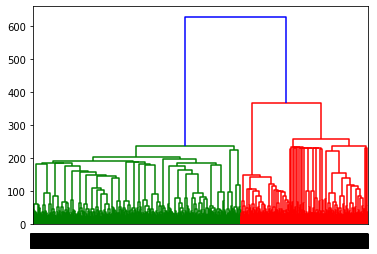

In [ ]:
dend2 = dendrogram(ward_link)

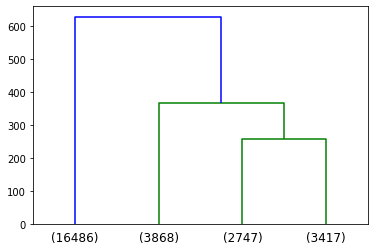

In [ ]:
dend = dendrogram(ward_link,
                 truncate_mode='lastp',
                 p = 4,
                 )

In [ ]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(ward_link, 4, criterion='maxclust')
clusters

array([1, 1, 1, ..., 1, 4, 1], dtype=int32)

In [ ]:
df_tel['clusters'] = clusters

In [ ]:
df_tel.head()

,mou_Mean,totmrc_Mean,rev_Range,mou_Range,change_mou,drop_blk_Mean,drop_vce_Range,owylis_vce_Range,mou_opkv_Range,months,totcalls,income,eqpdays,custcare_Mean,callwait_Mean,iwylis_vce_Mean,callwait_Range,ccrndmou_Range,adjqty,ovrrev_Mean,rev_Mean,ovrmou_Mean,comp_vce_Mean,plcd_vce_Mean,avg3mou,avgmou,avg3qty,avgqty,avg6mou,avg6qty,crclscod,age1,age2,models,hnd_price,actvsubs,uniqsubs,forgntvl,opk_dat_Mean,mtrcycle,...,hnd_webcap_WCMB,marital_B,marital_M,marital_S,marital_U,ethnic_C,ethnic_D,ethnic_F,ethnic_G,ethnic_H,ethnic_I,ethnic_J,ethnic_M,ethnic_N,ethnic_O,ethnic_P,ethnic_R,ethnic_S,ethnic_U,ethnic_X,ethnic_Z,dwlltype_S,dwlltype_U,dwllsize_B,dwllsize_C,dwllsize_D,dwllsize_E,dwllsize_F,dwllsize_G,dwllsize_H,dwllsize_I,dwllsize_J,dwllsize_K,dwllsize_L,dwllsize_M,dwllsize_N,dwllsize_O,dwllsize_U,car_buy_UNKNOWN,clusters
0,190.25,63.9400,26.00,43.0,-11.25,4.666667,8.0,20.0,28.44,14.0,1104.0,9.0,403.0,0.000000,0.666667,10.333333,2.0,0.0,1104.0,2.050,53.4900,5.50,59.333333,73.333333,194.0,182.77,91.0,84.92,211.0,99.0,3.0,36.0,0.0,1.0,199.98999,2.0,2.0,0.0,0.0,0.0,...,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
1,443.00,39.9900,5.10,199.0,-78.00,4.333333,5.0,33.0,72.46,13.0,2237.0,9.0,404.0,1.333333,0.000000,16.333333,0.0,14.0,2230.0,8.840,34.3575,25.00,87.000000,104.333333,469.0,463.75,188.0,185.83,467.0,166.0,20.5,0.0,0.0,1.0,149.98999,1.0,1.0,0.0,0.0,0.0,...,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,400.50,44.9900,13.88,172.0,-67.50,2.000000,1.0,7.0,93.60,29.0,3276.0,6.0,213.0,1.000000,0.000000,0.000000,0.0,17.5,3269.0,4.725,40.5350,13.50,124.666667,153.000000,423.0,291.33,134.0,121.07,333.0,118.0,7.0,32.0,30.0,2.0,99.98999,1.0,1.0,0.0,0.0,0.0,...,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,53.50,34.6675,18.56,78.0,12.50,1.333333,2.0,0.0,4.70,25.0,1932.0,8.0,757.0,4.166667,0.000000,0.000000,0.0,17.5,1924.0,9.300,38.7400,23.25,32.333333,43.000000,49.0,243.50,25.0,80.17,244.0,95.0,20.5,34.0,38.0,1.0,29.98999,1.0,1.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
4,37.00,21.0425,35.79,74.0,-33.00,5.666667,1.0,4.0,36.60,33.0,652.0,5.0,972.0,0.333333,0.000000,0.000000,0.0,4.0,636.0,0.000,21.0425,0.00,10.666667,18.000000,48.0,50.74,12.0,20.52,43.0,16.0,20.5,78.0,0.0,1.0,29.98999,1.0,1.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1


In [ ]:
df_tel.clusters.value_counts().sort_index()

1    16486
2     3868
3     2747
4     3417
Name: clusters, dtype: int64

In [ ]:
aggdata=df_tel.groupby('clusters').mean()
aggdata['Freq']=df_tel.clusters.value_counts().sort_index()
aggdata

,mou_Mean,totmrc_Mean,rev_Range,mou_Range,change_mou,drop_blk_Mean,drop_vce_Range,owylis_vce_Range,mou_opkv_Range,months,totcalls,income,eqpdays,custcare_Mean,callwait_Mean,iwylis_vce_Mean,callwait_Range,ccrndmou_Range,adjqty,ovrrev_Mean,rev_Mean,ovrmou_Mean,comp_vce_Mean,plcd_vce_Mean,avg3mou,avgmou,avg3qty,avgqty,avg6mou,avg6qty,crclscod,age1,age2,models,hnd_price,actvsubs,uniqsubs,forgntvl,opk_dat_Mean,mtrcycle,...,hnd_webcap_WCMB,marital_B,marital_M,marital_S,marital_U,ethnic_C,ethnic_D,ethnic_F,ethnic_G,ethnic_H,ethnic_I,ethnic_J,ethnic_M,ethnic_N,ethnic_O,ethnic_P,ethnic_R,ethnic_S,ethnic_U,ethnic_X,ethnic_Z,dwlltype_S,dwlltype_U,dwllsize_B,dwllsize_C,dwllsize_D,dwllsize_E,dwllsize_F,dwllsize_G,dwllsize_H,dwllsize_I,dwllsize_J,dwllsize_K,dwllsize_L,dwllsize_M,dwllsize_N,dwllsize_O,dwllsize_U,car_buy_UNKNOWN,Freq
clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,309.569126,40.675758,23.921994,235.595839,-1.979576,5.436390,3.221825,9.164109,65.537651,18.475312,1697.372051,5.958692,411.623013,0.659580,0.492357,3.559242,0.729710,2.753336,1668.723015,5.007821,44.336753,14.456780,64.371143,85.749990,310.189494,312.144769,105.918234,108.850259,314.559505,108.009705,5.934763,32.580735,22.858061,1.378230,97.226130,1.370739,1.508735,0.0,0.0,0.0,...,0.734502,0.058656,0.355999,0.153524,0.376683,0.000000,0.000000,0.031178,0.066663,0.116341,0.040095,0.029176,0.000000,0.371709,0.035727,0.000000,0.000000,0.137207,0.115128,0.00000,0.045432,0.573820,0.317118,0.060961,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.382142,0.554288,16486
2,1109.149738,65.308482,72.822853,637.642192,-33.141697,18.606774,8.437435,26.107161,186.421962,19.171277,5111.328077,5.571096,259.824716,2.158695,2.933083,13.930110,3.267839,8.694933,5044.945127,18.861138,90.580345,56.118187,237.986729,314.559118,1126.988366,966.052533,382.231127,343.979088,1053.914943,361.290589,9.092684,27.215615,17.074199,1.989917,121.260673,1.308428,1.477120,0.0,0.0,0.0,...,0.893226,0.089710,0.232161,0.183816,0.449328,0.000000,0.000000,0.001034,0.039814,0.197001,0.050414,0.036194,0.000000,0.319545,0.006980,0.000000,0.000000,0.125129,0.113495,0.00000,0.095657,0.461479,0.397622,0.071872,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.479317,0.630041,3868
3,519.980824,46.869652,37.453815,345.746815,-7.976414,8.875137,4.908264,13.760466,97.027298,19.234438,2710.188888,4.777940,368.937750,1.114307,0.884237,6.550055,1.121587,4.673826,2670.818802,8.847292,56.194272,25.808401,110.670974,145.164907,524.111030,478.649411,179.285038,171.666994,511.419367,176.400801,7.087550,36.016017,18.809610,1.596833,106.699128,1.262468,1.408628,0.0,0.0,0.0,...,0.781944,0.154714,0.231525,0.351292,0.206043,0.000000,0.079723,0.017474,0.047324,0.153986,0.035311,0.034947,0.013105,0.297415,0.042956,0.000728,0.006189,0.105206,0.092829,0.00000,0.059337,0.074263,0.024754,0.003276,0.151438,0.072443,0.053513,0.038588,0.040772,0.034947,0.026574,0.135420,0.063706,0.056425,0.035311,0.098289,0.111394,0.031671,0.595195,2747
4,747.427111,53.339738,58.979888,511.918057,-14.482294,12.200176,6.702078,19.140181,141.600256,17.770705,3444.906863,5.928300,308.459467,1.561409,1.434787,8.743049,1.788118,6.332016,3399.219344,14.874620,71.925151,43.274403,150.074090,198.786167,754.840796,682.306651,249.869476,235.361222,715.340064,239.657302,8.438835,25.552239,15.835528,1.655399,119.448580,1.290898,1.440006,0.0,0.0,0.0,...,0.862745,0.041264,0.221247,0.182031,0.519462,0.021364,0.000000,0.000293,0.058824,0.119696,0.003512,0.000585,0.000000,0.350893,0.079895,0.040679,0.068481,0.111794,0.101844,0.00878,0.014633,0.444542,0.452736,0.016389,0.001171,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003512,0.000585,0.000293,0.000000,0.002049,0.002634,0.541118,0.660521,3417


In [ ]:
wss =[] 

In [ ]:
from sklearn.cluster import KMeans 

In [ ]:
for i in range(1,15):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

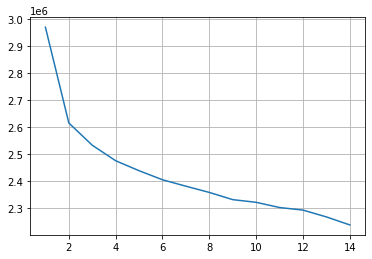

In [ ]:
plt.plot(range(1,15), wss)
plt.grid()
plt.show()

In [ ]:
k_means = KMeans(n_clusters = 2)
k_means.fit(scaled_df)
labels = k_means.labels_
labels

array([1, 1, 1, ..., 1, 0, 0], dtype=int32)

In [ ]:
k_means4 = KMeans(n_clusters = 4)
k_means4.fit(scaled_df)
labels_4 = k_means4.labels_
labels_4

array([2, 1, 2, ..., 1, 0, 0], dtype=int32)

In [ ]:
df_Kmeans = df_tel.drop('clusters',axis=1)

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_score(df_Kmeans,labels)


0.4240958655343991

In [ ]:
silhouette_score(df_Kmeans,labels_4)

0.0018734270860022635

In [ ]:
df_Kmeans['Kmeans_clusters'] = labels_4

In [ ]:
df_Kmeans.head()

,mou_Mean,totmrc_Mean,rev_Range,mou_Range,change_mou,drop_blk_Mean,drop_vce_Range,owylis_vce_Range,mou_opkv_Range,months,totcalls,income,eqpdays,custcare_Mean,callwait_Mean,iwylis_vce_Mean,callwait_Range,ccrndmou_Range,adjqty,ovrrev_Mean,rev_Mean,ovrmou_Mean,comp_vce_Mean,plcd_vce_Mean,avg3mou,avgmou,avg3qty,avgqty,avg6mou,avg6qty,crclscod,age1,age2,models,hnd_price,actvsubs,uniqsubs,forgntvl,opk_dat_Mean,mtrcycle,...,hnd_webcap_WCMB,marital_B,marital_M,marital_S,marital_U,ethnic_C,ethnic_D,ethnic_F,ethnic_G,ethnic_H,ethnic_I,ethnic_J,ethnic_M,ethnic_N,ethnic_O,ethnic_P,ethnic_R,ethnic_S,ethnic_U,ethnic_X,ethnic_Z,dwlltype_S,dwlltype_U,dwllsize_B,dwllsize_C,dwllsize_D,dwllsize_E,dwllsize_F,dwllsize_G,dwllsize_H,dwllsize_I,dwllsize_J,dwllsize_K,dwllsize_L,dwllsize_M,dwllsize_N,dwllsize_O,dwllsize_U,car_buy_UNKNOWN,Kmeans_clusters
0,190.25,63.9400,26.00,43.0,-11.25,4.666667,8.0,20.0,28.44,14.0,1104.0,9.0,403.0,0.000000,0.666667,10.333333,2.0,0.0,1104.0,2.050,53.4900,5.50,59.333333,73.333333,194.0,182.77,91.0,84.92,211.0,99.0,3.0,36.0,0.0,1.0,199.98999,2.0,2.0,0.0,0.0,0.0,...,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2
1,443.00,39.9900,5.10,199.0,-78.00,4.333333,5.0,33.0,72.46,13.0,2237.0,9.0,404.0,1.333333,0.000000,16.333333,0.0,14.0,2230.0,8.840,34.3575,25.00,87.000000,104.333333,469.0,463.75,188.0,185.83,467.0,166.0,20.5,0.0,0.0,1.0,149.98999,1.0,1.0,0.0,0.0,0.0,...,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,400.50,44.9900,13.88,172.0,-67.50,2.000000,1.0,7.0,93.60,29.0,3276.0,6.0,213.0,1.000000,0.000000,0.000000,0.0,17.5,3269.0,4.725,40.5350,13.50,124.666667,153.000000,423.0,291.33,134.0,121.07,333.0,118.0,7.0,32.0,30.0,2.0,99.98999,1.0,1.0,0.0,0.0,0.0,...,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,53.50,34.6675,18.56,78.0,12.50,1.333333,2.0,0.0,4.70,25.0,1932.0,8.0,757.0,4.166667,0.000000,0.000000,0.0,17.5,1924.0,9.300,38.7400,23.25,32.333333,43.000000,49.0,243.50,25.0,80.17,244.0,95.0,20.5,34.0,38.0,1.0,29.98999,1.0,1.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
4,37.00,21.0425,35.79,74.0,-33.00,5.666667,1.0,4.0,36.60,33.0,652.0,5.0,972.0,0.333333,0.000000,0.000000,0.0,4.0,636.0,0.000,21.0425,0.00,10.666667,18.000000,48.0,50.74,12.0,20.52,43.0,16.0,20.5,78.0,0.0,1.0,29.98999,1.0,1.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1


In [ ]:
agdata=df_Kmeans.groupby('Kmeans_clusters').mean()
agdata['Freq']=df_Kmeans.Kmeans_clusters.value_counts().sort_index()
agdata

,mou_Mean,totmrc_Mean,rev_Range,mou_Range,change_mou,drop_blk_Mean,drop_vce_Range,owylis_vce_Range,mou_opkv_Range,months,totcalls,income,eqpdays,custcare_Mean,callwait_Mean,iwylis_vce_Mean,callwait_Range,ccrndmou_Range,adjqty,ovrrev_Mean,rev_Mean,ovrmou_Mean,comp_vce_Mean,plcd_vce_Mean,avg3mou,avgmou,avg3qty,avgqty,avg6mou,avg6qty,crclscod,age1,age2,models,hnd_price,actvsubs,uniqsubs,forgntvl,opk_dat_Mean,mtrcycle,...,hnd_webcap_WCMB,marital_B,marital_M,marital_S,marital_U,ethnic_C,ethnic_D,ethnic_F,ethnic_G,ethnic_H,ethnic_I,ethnic_J,ethnic_M,ethnic_N,ethnic_O,ethnic_P,ethnic_R,ethnic_S,ethnic_U,ethnic_X,ethnic_Z,dwlltype_S,dwlltype_U,dwllsize_B,dwllsize_C,dwllsize_D,dwllsize_E,dwllsize_F,dwllsize_G,dwllsize_H,dwllsize_I,dwllsize_J,dwllsize_K,dwllsize_L,dwllsize_M,dwllsize_N,dwllsize_O,dwllsize_U,car_buy_UNKNOWN,Freq
Kmeans_clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,680.712666,52.271323,52.907266,469.628470,-12.055898,11.697332,6.307442,18.542823,136.265114,18.905346,3490.077857,5.545481,315.988039,1.502756,1.502067,8.591209,1.873006,6.128249,3441.639102,13.532454,68.240842,39.434034,142.268188,188.647076,683.652835,621.192626,232.327377,219.846373,656.086680,225.474601,7.623523,32.066155,19.949793,1.724749,114.985560,1.312832,1.470762,0.0,0.0,0.0,...,0.854105,0.091258,0.269049,0.234938,0.347903,0.002806,0.007974,0.020230,0.052569,0.159923,0.038098,0.028057,0.001477,0.328706,0.038541,0.005907,0.011961,0.124778,0.105582,0.001624,0.058033,0.499852,0.248671,0.061134,0.020526,0.010041,0.006940,0.004430,0.005168,0.004725,0.004135,0.019640,0.009008,0.007383,0.005611,0.014471,0.016096,0.329002,0.572947,6772
1,309.273638,41.561712,26.041829,253.251293,-0.678552,5.296904,3.331610,9.603851,68.875500,16.049028,1565.314249,5.747014,369.742735,0.703720,0.367950,3.531705,0.629167,3.026475,1537.733264,4.825255,44.194254,13.629498,59.617341,80.121887,310.814227,336.455366,103.801569,113.824601,323.368515,108.853272,8.039936,9.978962,1.533250,1.328936,105.919746,1.278124,1.443305,0.0,0.0,0.0,...,0.795507,0.069888,0.010162,0.079337,0.834373,0.004635,0.007131,0.022107,0.052772,0.149938,0.029417,0.023355,0.001248,0.345516,0.048137,0.007310,0.010519,0.117668,0.122125,0.001248,0.039044,0.019968,0.858442,0.008023,0.002853,0.002496,0.001070,0.001248,0.001783,0.001783,0.001070,0.004814,0.002674,0.002674,0.000713,0.003031,0.003744,0.948119,0.904974,5609
2,197.210620,36.413258,14.784780,161.986843,2.010776,3.618866,2.317617,6.236036,42.623683,19.544850,1238.333170,6.060648,459.487822,0.379732,0.203724,2.145228,0.378069,1.635723,1215.354788,2.806694,37.126174,8.009102,42.360038,56.180801,196.349897,206.669655,68.797026,73.238359,205.582217,71.990609,4.439939,45.076396,34.249829,1.302944,88.749161,1.416903,1.534823,0.0,0.0,0.0,...,0.671916,0.055757,0.547002,0.199061,0.120708,0.001272,0.008217,0.023770,0.075809,0.085396,0.042160,0.029835,0.001467,0.390394,0.033943,0.003521,0.004989,0.143402,0.110144,0.000685,0.034628,0.793603,0.012423,0.068082,0.018683,0.008510,0.006456,0.005184,0.005087,0.004206,0.002739,0.015651,0.006945,0.007043,0.004108,0.012814,0.014282,0.049985,0.370733,10223
3,1281.427536,70.222993,83.028937,713.495529,-42.752225,20.884773,9.463720,28.633878,206.199278,19.020184,5594.147515,5.472407,242.052887,2.456353,3.187362,15.459291,3.521461,9.785641,5523.707013,21.268380,100.122882,63.564576,272.787728,359.517459,1305.993868,1104.323743,437.425141,389.590559,1214.383495,410.876341,10.016352,24.196219,14.007409,2.045861,125.982581,1.275805,1.438554,0.0,0.0,0.0,...,0.905723,0.076648,0.175779,0.193664,0.515841,0.003832,0.010475,0.016096,0.040112,0.182678,0.028360,0.023761,0.001022,0.312979,0.032959,0.006132,0.015330,0.113950,0.105774,0.001277,0.093510,0.346960,0.448390,0.049310,0.018906,0.007665,0.007154,0.004088,0.003832,0.002810,0.002810,0.016352,0.007665,0.004854,0.003321,0.007920,0.009964,0.519417,0.695197,3914


In [ ]:
agdata.describe()

,mou_Mean,totmrc_Mean,rev_Range,mou_Range,change_mou,drop_blk_Mean,drop_vce_Range,owylis_vce_Range,mou_opkv_Range,months,totcalls,income,eqpdays,custcare_Mean,callwait_Mean,iwylis_vce_Mean,callwait_Range,ccrndmou_Range,adjqty,ovrrev_Mean,rev_Mean,ovrmou_Mean,comp_vce_Mean,plcd_vce_Mean,avg3mou,avgmou,avg3qty,avgqty,avg6mou,avg6qty,crclscod,age1,age2,models,hnd_price,actvsubs,uniqsubs,forgntvl,opk_dat_Mean,mtrcycle,...,hnd_webcap_WCMB,marital_B,marital_M,marital_S,marital_U,ethnic_C,ethnic_D,ethnic_F,ethnic_G,ethnic_H,ethnic_I,ethnic_J,ethnic_M,ethnic_N,ethnic_O,ethnic_P,ethnic_R,ethnic_S,ethnic_U,ethnic_X,ethnic_Z,dwlltype_S,dwlltype_U,dwllsize_B,dwllsize_C,dwllsize_D,dwllsize_E,dwllsize_F,dwllsize_G,dwllsize_H,dwllsize_I,dwllsize_J,dwllsize_K,dwllsize_L,dwllsize_M,dwllsize_N,dwllsize_O,dwllsize_U,car_buy_UNKNOWN,Freq
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.0,4.0,4.0,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,617.156115,50.117322,44.190703,399.590534,-13.368975,10.374469,5.355097,15.754147,113.490894,18.379852,2971.968198,5.706387,346.817871,1.260640,1.315276,7.431858,1.600426,5.144022,2929.608542,10.608196,62.421038,31.159303,129.258324,171.116806,624.202707,567.160347,210.587778,199.124973,599.855227,204.298706,7.529938,27.829433,17.435070,1.600622,108.909262,1.320916,1.471861,0.0,0.0,0.0,...,0.806813,0.073388,0.250498,0.176750,0.454706,0.003136,0.008449,0.020551,0.055316,0.144484,0.034509,0.026252,0.001303,0.344399,0.038395,0.005717,0.010700,0.124950,0.110906,0.001209,0.056304,0.415096,0.391982,0.046637,0.015242,0.007178,0.005405,0.003738,0.003968,0.003381,0.002688,0.014114,0.006573,0.005489,0.003439,0.009559,0.011021,0.461631,0.635963,6629.500000
std,488.685923,14.942976,30.432859,245.840291,20.515710,7.823816,3.220172,10.034686,73.317129,1.578620,2010.673828,0.263178,91.553714,0.926375,1.375084,6.026149,1.437843,3.619645,1988.928095,8.495031,28.444947,25.572112,105.152469,138.193676,499.881276,397.761372,166.769013,141.220996,451.922957,152.466391,2.309343,14.688398,13.585245,0.354058,15.745756,0.066194,0.044310,0.0,0.0,0.0,...,0.100573,0.014755,0.224798,0.067476,0.300470,0.001451,0.001428,0.003303,0.014890,0.041706,0.006712,0.003198,0.000215,0.033418,0.006935,0.001588,0.004308,0.013096,0.007770,0.000389,0.026802,0.322087,0.358408,0.026884,0.008300,0.003273,0.002905,0.001722,0.001580,0.001338,0.001256,0.006439,0.002736,0.002185,0.002050,0.005165,0.005491,0.377294,0.223751,2667.639968
min,197.210620,36.413258,14.784780,161.986843,-42.752225,3.618866,2.317617,6.236036,42.623683,16.049028,1238.333170,5.472407,242.052887,0.379732,0.203724,2.145228,0.378069,1.635723,1215.354788,2.806694,37.126174,8.009102,42.360038,56.180801,196.349897,206.669655,68.797026,73.238359,205.582217,71.990609,4.439939,9.978962,1.533250,1.302944,88.749161,1.275805,1.438554,0.0,0.0,0.0,...,0.671916,0.055757,0.010162,0.079337,0.120708,0.001272,0.007131,0.016096,0.040112,0.085396,0.028360,0.023355,0.001022,0.312979,0.032959,0.003521,0.004989,0.113950,0.105582,0.000685,0.034628,0.019968,0.012423,0.008023,0.002853,0.002496,0.001070,0.001248,0.001783,0.001783,0.001070,0.004814,0.002674,0.002674,0.000713,0.003031,0.003744,0.049985,0.370733,3914.000000
25%,281.257883,40.274599,23.227567,230.435180,-19.729980,4.877394,3.078112,8.761897,62.312546,18.191266,1483.568980,5.527213,297.504251,0.622723,0.326894,3.185086,0.566393,2.678787,1457.138645,4

In [ ]:
agdata.to_csv('/content/drive/MyDrive/GL-DSBA-20-21/Capstone Project/cluster.csv') 

###**Model Building**

In [123]:
X = df_tel.drop('churn', axis=1)
y = df_tel['churn']

In [124]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)

In [125]:
X.head()

,mou_Mean,totmrc_Mean,rev_Range,mou_Range,change_mou,drop_blk_Mean,drop_vce_Range,owylis_vce_Range,mou_opkv_Range,months,totcalls,income,eqpdays,custcare_Mean,callwait_Mean,iwylis_vce_Mean,callwait_Range,ccrndmou_Range,adjqty,ovrrev_Mean,rev_Mean,ovrmou_Mean,comp_vce_Mean,plcd_vce_Mean,avg3mou,avgmou,avg3qty,avgqty,avg6mou,avg6qty,crclscod,age1,age2,models,hnd_price,actvsubs,uniqsubs,forgntvl,opk_dat_Mean,mtrcycle,...,hnd_webcap_WC,hnd_webcap_WCMB,marital_B,marital_M,marital_S,marital_U,ethnic_C,ethnic_D,ethnic_F,ethnic_G,ethnic_H,ethnic_I,ethnic_J,ethnic_M,ethnic_N,ethnic_O,ethnic_P,ethnic_R,ethnic_S,ethnic_U,ethnic_X,ethnic_Z,dwlltype_S,dwlltype_U,dwllsize_B,dwllsize_C,dwllsize_D,dwllsize_E,dwllsize_F,dwllsize_G,dwllsize_H,dwllsize_I,dwllsize_J,dwllsize_K,dwllsize_L,dwllsize_M,dwllsize_N,dwllsize_O,dwllsize_U,car_buy_UNKNOWN
0,190.25,63.9400,26.00,43.0,-11.25,4.666667,8.0,20.0,28.44,14.0,1104.0,9.0,403.0,0.000000,0.666667,10.333333,2.0,0.0,1104.0,2.050,53.4900,5.50,59.333333,73.333333,194.0,182.77,91.0,84.92,211.0,99.0,3.0,36.0,0.0,1.0,199.98999,2.0,2.0,0.0,0.0,0.0,...,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,443.00,39.9900,5.10,199.0,-78.00,4.333333,5.0,33.0,72.46,13.0,2237.0,9.0,404.0,1.333333,0.000000,16.333333,0.0,14.0,2230.0,8.840,34.3575,25.00,87.000000,104.333333,469.0,463.75,188.0,185.83,467.0,166.0,20.5,0.0,0.0,1.0,149.98999,1.0,1.0,0.0,0.0,0.0,...,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,400.50,44.9900,13.88,172.0,-67.50,2.000000,1.0,7.0,93.60,29.0,3276.0,6.0,213.0,1.000000,0.000000,0.000000,0.0,17.5,3269.0,4.725,40.5350,13.50,124.666667,153.000000,423.0,291.33,134.0,121.07,333.0,118.0,7.0,32.0,30.0,2.0,99.98999,1.0,1.0,0.0,0.0,0.0,...,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,53.50,34.6675,18.56,78.0,12.50,1.333333,2.0,0.0,4.70,25.0,1932.0,8.0,757.0,4.166667,0.000000,0.000000,0.0,17.5,1924.0,9.300,38.7400,23.25,32.333333,43.000000,49.0,243.50,25.0,80.17,244.0,95.0,20.5,34.0,38.0,1.0,29.98999,1.0,1.0,0.0,0.0,0.0,...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,37.00,21.0425,35.79,74.0,-33.00,5.666667,1.0,4.0,36.60,33.0,652.0,5.0,972.0,0.333333,0.000000,0.000000,0.0,4.0,636.0,0.000,21.0425,0.00,10.666667,18.000000,48.0,50.74,12.0,20.52,43.0,16.0,20.5,78.0,0.0,1.0,29.98999,1.0,1.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [126]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: churn, dtype: int64

In [127]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
LDA_model= LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

0.763010451459972
              precision    recall  f1-score   support

           0       0.77      0.99      0.86     14139
           1       0.55      0.03      0.05      4423

    accuracy                           0.76     18562
   macro avg       0.66      0.51      0.46     18562
weighted avg       0.71      0.76      0.67     18562



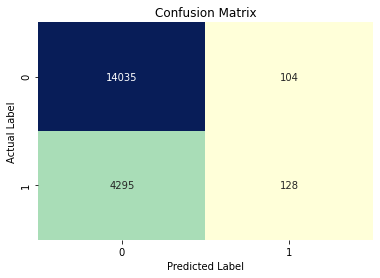

In [128]:
from sklearn import metrics
y_train_predict = LDA_model.predict(X_train)
model_score = LDA_model.score(X_train, y_train)
print(model_score)
sns.heatmap(metrics.confusion_matrix(y_train, y_train_predict), annot=True,fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
print(metrics.classification_report(y_train, y_train_predict))

0.7547762694821518
              precision    recall  f1-score   support

           0       0.76      0.99      0.86      6015
           1       0.44      0.02      0.04      1941

    accuracy                           0.75      7956
   macro avg       0.60      0.51      0.45      7956
weighted avg       0.68      0.75      0.66      7956



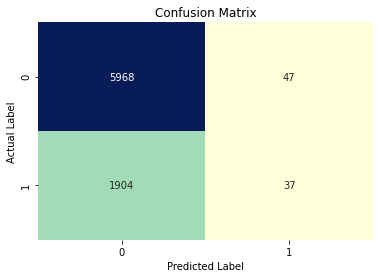

In [ ]:
## Performance Matrix on test data set
y_test_predict = LDA_model.predict(X_test)
model_score = LDA_model.score(X_test, y_test)
print(model_score)
sns.heatmap(metrics.confusion_matrix(y_test, y_test_predict), annot=True,fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
print(metrics.classification_report(y_test, y_test_predict))

AUC: 0.644


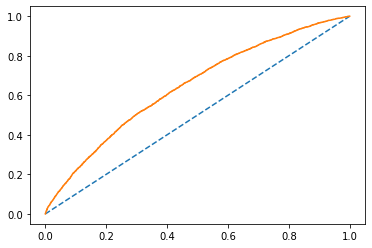

In [ ]:
probs = LDA_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lda_train_auc)
# calculate roc curve
lda_train_fpr, lda_train_tpr, lda_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_train_fpr, lda_train_tpr)

AUC: 0.625


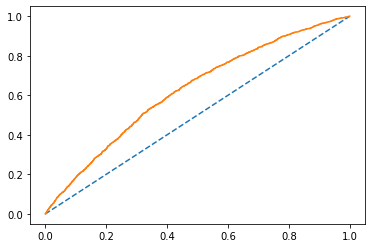

In [ ]:
probs = LDA_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lda_test_auc)
# calculate roc curve
lda_test_fpr, lda_test_tpr, lda_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_test_fpr, lda_test_tpr)

In [129]:
from sklearn.linear_model import LogisticRegression

In [130]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs'],
      'tol':[0.0001,0.00001]}

In [131]:
LR_model = LogisticRegression(max_iter=10000,n_jobs=-1)

In [132]:
from sklearn.model_selection import train_test_split,GridSearchCV
grid_search = GridSearchCV(estimator = LR_model, param_grid = grid, cv = 5,n_jobs=-1,scoring='f1')

In [ ]:
X_train.head()

,mou_Mean,totmrc_Mean,rev_Range,mou_Range,change_mou,drop_blk_Mean,drop_vce_Range,owylis_vce_Range,mou_opkv_Range,months,totcalls,income,eqpdays,custcare_Mean,callwait_Mean,iwylis_vce_Mean,callwait_Range,ccrndmou_Range,adjqty,ovrrev_Mean,rev_Mean,ovrmou_Mean,comp_vce_Mean,plcd_vce_Mean,avg3mou,avgmou,avg3qty,avgqty,avg6mou,avg6qty,crclscod,age1,age2,models,hnd_price,actvsubs,uniqsubs,forgntvl,opk_dat_Mean,mtrcycle,...,hnd_webcap_WCMB,marital_B,marital_M,marital_S,marital_U,ethnic_C,ethnic_D,ethnic_F,ethnic_G,ethnic_H,ethnic_I,ethnic_J,ethnic_M,ethnic_N,ethnic_O,ethnic_P,ethnic_R,ethnic_S,ethnic_U,ethnic_X,ethnic_Z,dwlltype_S,dwlltype_U,dwllsize_B,dwllsize_C,dwllsize_D,dwllsize_E,dwllsize_F,dwllsize_G,dwllsize_H,dwllsize_I,dwllsize_J,dwllsize_K,dwllsize_L,dwllsize_M,dwllsize_N,dwllsize_O,dwllsize_U,car_buy_UNKNOWN,clusters
8395,128.00,10.000,0.99,90.0,-17.00,2.0,2.0,3.0,16.75,11.0,712.0,5.0,315.0,1.666667,0.333333,9.666667,1.0,5.0,697.0,0.0000,10.247500,0.00,41.333333,75.333333,134.0,151.90,64.0,69.70,147.0,65.0,20.5,0.0,0.0,1.0,59.98999,2.0,3.5,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2088,56.50,104.975,0.00,113.0,66.50,7.0,2.0,2.0,17.14,14.0,193.0,6.0,403.0,0.000000,0.000000,0.666667,0.0,0.0,191.0,0.0000,128.954375,0.00,13.333333,25.333333,34.0,28.15,18.0,14.69,41.0,22.0,20.5,60.0,58.0,1.0,59.98999,2.0,2.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
22024,277.50,30.000,16.23,143.0,-18.50,2.0,1.0,0.0,153.91,28.0,1230.0,6.0,844.0,4.166667,0.000000,0.000000,0.0,8.0,1202.0,3.7625,32.732500,10.75,50.666667,76.666667,284.0,326.96,50.0,44.52,282.0,46.0,0.0,50.0,0.0,2.0,29.98999,1.0,1.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
22429,474.00,40.000,15.75,354.0,59.00,3.0,6.0,26.0,183.78,14.0,800.0,7.0,412.0,4.000000,0.000000,0.333333,0.0,17.5,800.0,3.9375,34.350000,11.25,79.000000,104.333333,454.0,304.75,59.0,66.67,379.0,71.0,3.0,0.0,0.0,1.0,129.98999,2.0,2.0,0.0,0.0,0.0,...,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
8277,959.75,104.975,5.94,323.0,157.25,27.0,16.0,27.0,35.32,10.0,3591.0,7.0,250.0,1.000000,3.000000,4.666667,3.0,3.0,3574.0,0.0000,127.950000,0.00,292.000000,339.333333,907.0,1062.11,347.0,397.11,1073.0,408.0,3.0,0.0,0.0,2.0,29.98999,1.0,1.0,0.0,0.0,0.0,...,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2


In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=10000, multi_class='auto',
                                          n_jobs=-1, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [ ]:
LR_best_model = grid_search.best_estimator_

In [ ]:
ytrain_predict = LR_best_model.predict(X_train)
ytest_predict = LR_best_model.predict(X_test)

In [ ]:
ytest_predict_prob=LR_best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.833634,0.166366
1,0.638101,0.361899
2,0.876030,0.123970
3,0.778294,0.221706
4,0.635653,0.364347


0.7624717164098697
              precision    recall  f1-score   support

           0       0.76      0.99      0.86     14139
           1       0.54      0.02      0.05      4423

    accuracy                           0.76     18562
   macro avg       0.65      0.51      0.45     18562
weighted avg       0.71      0.76      0.67     18562



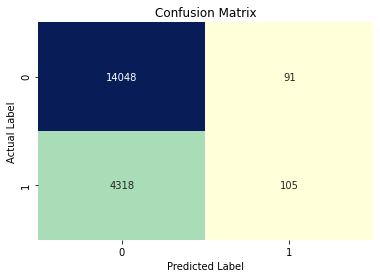

In [ ]:
LR_model_score = LR_best_model.score(X_train, y_train)
print(LR_model_score)
sns.heatmap(metrics.confusion_matrix(y_train, ytrain_predict), annot=True,fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
print(metrics.classification_report(y_train, ytrain_predict))

0.7547762694821518
              precision    recall  f1-score   support

           0       0.76      0.99      0.86      6015
           1       0.43      0.02      0.03      1941

    accuracy                           0.75      7956
   macro avg       0.60      0.50      0.45      7956
weighted avg       0.68      0.75      0.66      7956



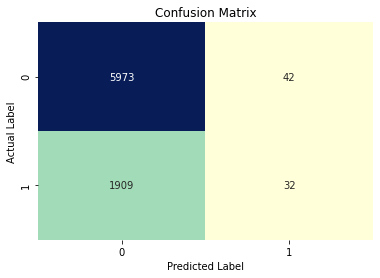

In [ ]:
LR_model_score = LR_best_model.score(X_test, y_test)
print(LR_model_score)
sns.heatmap(metrics.confusion_matrix(y_test, ytest_predict), annot=True,fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
print(metrics.classification_report(y_test, ytest_predict))

AUC: 0.637


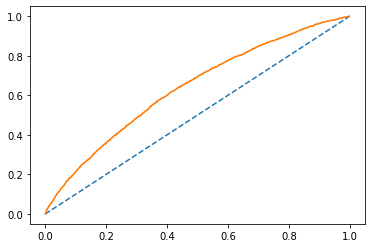

In [ ]:
probs = LR_best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
logit_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % logit_train_auc)
# calculate roc curve
logit_train_fpr, logit_train_tpr, logit_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(logit_train_fpr, logit_train_tpr)

AUC: 0.619


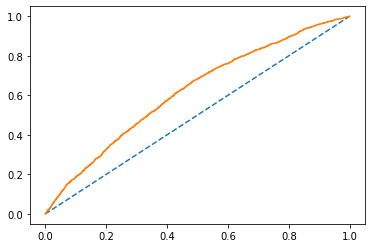

In [ ]:
# plot the roc curve for the model
probs = LR_best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
logit_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % logit_test_auc)
# calculate roc curve
logit_test_fpr, logit_test_tpr, logit_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(logit_test_fpr, logit_test_tpr)

In [136]:
from sklearn.ensemble import RandomForestClassifier

In [137]:
param_grid = {
    'max_depth': [30, 50,100], 
    'max_features': [2, 3, 7], 
    'min_samples_leaf': [2, 5, 7],
    'min_samples_split': [10, 15, 30],
    'n_estimators': [100, 300, 500]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)  

In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_params_

In [ ]:
RF_best_grid = grid_search.best_estimator_
RF_best_grid

###**Important Features**

In [ ]:
x=pd.DataFrame(RF_best_grid.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(30,30))
sns.barplot(x[0],x.index,palette='dark')
plt.xlabel('Feature Importance in %')
plt.ylabel('Features')
plt.title('Feature Importance using RF')
plt.show()

###**Model Building**

In [ ]:
ytrain_predict = RF_best_grid.predict(X_train)
ytest_predict = RF_best_grid.predict(X_test)

In [ ]:
ytrain_predict = RF_best_grid.predict(X_train)
RF_model_score =RF_best_grid.score(X_train, y_train)
print(RF_model_score)
sns.heatmap(confusion_matrix(y_train,ytrain_predict), annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
print(metrics.classification_report(y_train, ytrain_predict))

In [ ]:
ytest_predict = RF_best_grid.predict(X_test)
RF_model_score = RF_best_grid.score(X_test, y_test)
print(RF_model_score)
sns.heatmap(metrics.confusion_matrix(y_test, ytest_predict), annot=True,fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
print(metrics.classification_report(y_test, ytest_predict))

In [ ]:
probs = RF_best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
rf_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % rf_train_auc)
# calculate roc curve
rf_train_fpr, rf_train_tpr, rf_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rf_train_fpr, rf_train_tpr)

In [ ]:
# plot the roc curve for the model
probs = RF_best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
rf_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % rf_test_auc)
# calculate roc curve
rf_test_fpr, rf_test_tpr, rf_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rf_test_fpr, rf_test_tpr)

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14139
           1       1.00      1.00      1.00      4423

    accuracy                           1.00     18562
   macro avg       1.00      1.00      1.00     18562
weighted avg       1.00      1.00      1.00     18562



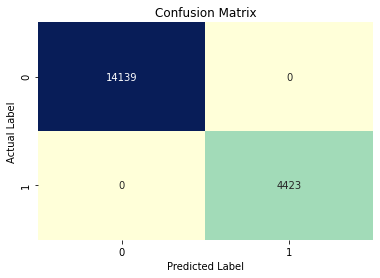

In [ ]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)
print(model_score)
sns.heatmap(metrics.confusion_matrix(y_train, y_train_predict), annot=True,fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
print(metrics.classification_report(y_train, y_train_predict))

0.7587983911513323
              precision    recall  f1-score   support

           0       0.77      0.98      0.86      6015
           1       0.55      0.06      0.12      1941

    accuracy                           0.76      7956
   macro avg       0.66      0.52      0.49      7956
weighted avg       0.71      0.76      0.68      7956



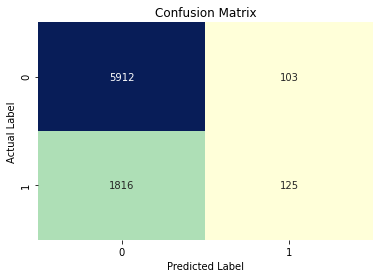

In [ ]:
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)
sns.heatmap(metrics.confusion_matrix(y_test, y_test_predict), annot=True,fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
print(metrics.classification_report(y_test, y_test_predict))

AUC: 1.000


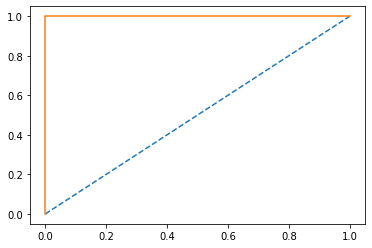

In [ ]:
probs = Bagging_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
bg_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % bg_train_auc)
# calculate roc curve
bg_train_fpr, bg_train_tpr, bg_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(bg_train_fpr, bg_train_tpr)

AUC: 0.639


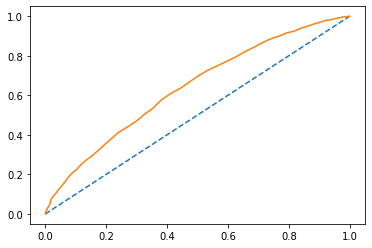

In [ ]:
# plot the roc curve for the model
probs = Bagging_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
bg_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % bg_test_auc)
# calculate roc curve
bg_test_fpr, bg_test_tpr, bg_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(bg_test_fpr, bg_test_tpr)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier


ADB_model = AdaBoostClassifier(n_estimators=200,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=200, random_state=1)

0.7709298566964766
              precision    recall  f1-score   support

           0       0.78      0.98      0.87     14139
           1       0.61      0.10      0.18      4423

    accuracy                           0.77     18562
   macro avg       0.70      0.54      0.52     18562
weighted avg       0.74      0.77      0.70     18562



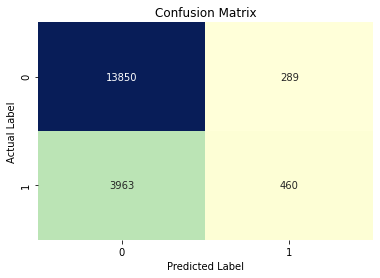

In [ ]:
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print(model_score)
sns.heatmap(metrics.confusion_matrix(y_train, y_train_predict), annot=True,fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
print(metrics.classification_report(y_train, y_train_predict))

0.7547762694821518
              precision    recall  f1-score   support

           0       0.77      0.97      0.86      6015
           1       0.49      0.09      0.14      1941

    accuracy                           0.75      7956
   macro avg       0.63      0.53      0.50      7956
weighted avg       0.70      0.75      0.68      7956



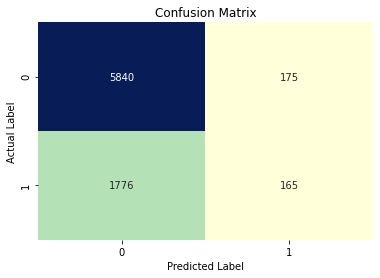

In [ ]:
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
sns.heatmap(metrics.confusion_matrix(y_test, y_test_predict), annot=True,fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
print(metrics.classification_report(y_test, y_test_predict))

AUC: 0.719


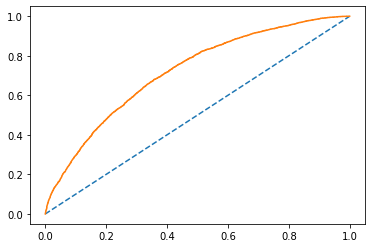

In [ ]:
probs = ADB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
ad_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % ad_train_auc)
# calculate roc curve
ad_train_fpr, ad_train_tpr, ad_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ad_train_fpr, ad_train_tpr)

AUC: 0.648


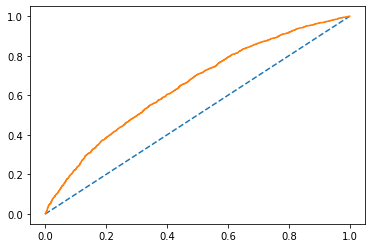

In [ ]:
# plot the roc curve for the model
probs = ADB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
ad_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % ad_test_auc)
# calculate roc curve
ad_test_fpr, ad_test_tpr, ad_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ad_test_fpr, ad_test_tpr)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, y_train)

0.7717918327766404
              precision    recall  f1-score   support

           0       0.77      0.99      0.87     14139
           1       0.77      0.06      0.11      4423

    accuracy                           0.77     18562
   macro avg       0.77      0.53      0.49     18562
weighted avg       0.77      0.77      0.69     18562



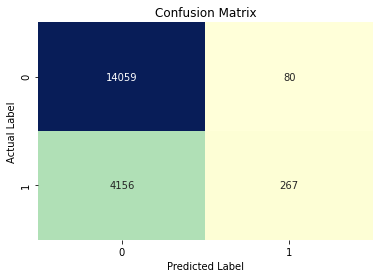

In [ ]:
y_train_predict = gbcl.predict(X_train)
model_score = gbcl.score(X_train, y_train)
print(model_score)
sns.heatmap(metrics.confusion_matrix(y_train, y_train_predict), annot=True,fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
print(metrics.classification_report(y_train, y_train_predict))

0.7589240824534942
              precision    recall  f1-score   support

           0       0.76      0.99      0.86      6015
           1       0.58      0.04      0.08      1941

    accuracy                           0.76      7956
   macro avg       0.67      0.52      0.47      7956
weighted avg       0.72      0.76      0.67      7956



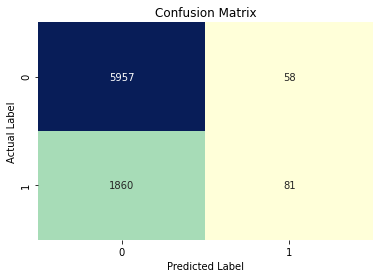

In [ ]:
y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
print(model_score)
sns.heatmap(metrics.confusion_matrix(y_test, y_test_predict), annot=True,fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
print(metrics.classification_report(y_test, y_test_predict))

AUC: 0.743


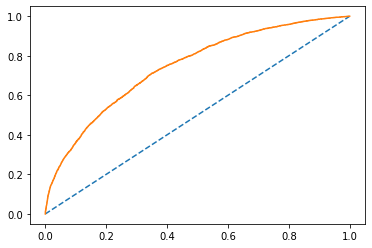

In [ ]:
probs = gbcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
gb_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % gb_train_auc)
# calculate roc curve
gb_train_fpr, gb_train_tpr, gb_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gb_train_fpr, gb_train_tpr)

AUC: 0.659


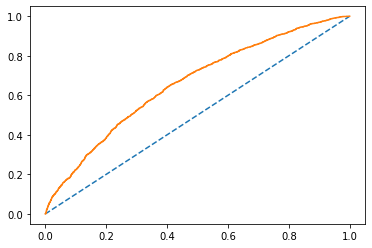

In [ ]:
# plot the roc curve for the model
probs = gbcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
gb_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % gb_test_auc)
# calculate roc curve
gb_test_fpr, gb_test_tpr, gb_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gb_test_fpr, gb_test_tpr)

0.6786984161189527
              precision    recall  f1-score   support

           0       0.79      0.78      0.79     14139
           1       0.33      0.34      0.34      4423

    accuracy                           0.68     18562
   macro avg       0.56      0.56      0.56     18562
weighted avg       0.68      0.68      0.68     18562



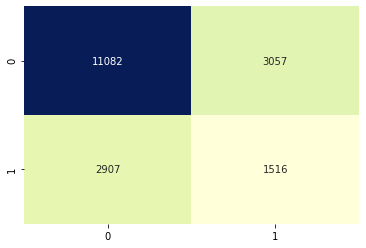

In [ ]:
NB_SM_model = GaussianNB()
NB_SM_model.fit(X_train, y_train)
y_train_predict = NB_SM_model.predict(X_train)
model_score = NB_SM_model.score(X_train, y_train)
print(model_score)
sns.heatmap(metrics.confusion_matrix(y_train, y_train_predict), annot=True,fmt='d', cbar=False,cmap='YlGnBu')
print(metrics.classification_report(y_train,y_train_predict))

0.672071392659628
              precision    recall  f1-score   support

           0       0.78      0.79      0.78      6015
           1       0.33      0.32      0.32      1941

    accuracy                           0.67      7956
   macro avg       0.55      0.55      0.55      7956
weighted avg       0.67      0.67      0.67      7956



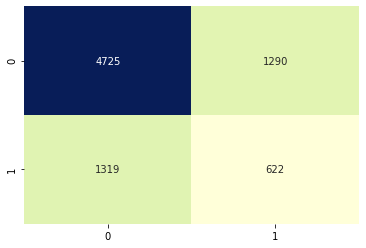

In [ ]:
y_test_predict = NB_SM_model.predict(X_test)
model_score = NB_SM_model.score(X_test, y_test)
print(model_score)
sns.heatmap(metrics.confusion_matrix(y_test, y_test_predict), annot=True,fmt='d', cbar=False,cmap='YlGnBu')
print(metrics.classification_report(y_test, y_test_predict))

AUC: 0.599


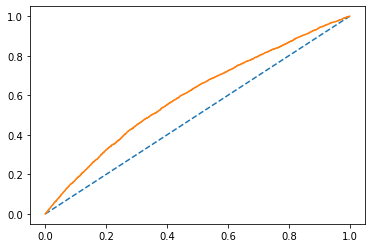

In [ ]:
probs_train = NB_SM_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_train = probs_train[:, 1]
# calculate AUC
nb_train_auc = roc_auc_score(y_train, probs_train)
print('AUC: %.3f' % nb_train_auc)
# calculate roc curve
nb_train_fpr, nb_train_tpr, nb_train_thresholds = roc_curve(y_train, probs_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(nb_train_fpr, nb_train_tpr)

AUC: 0.589


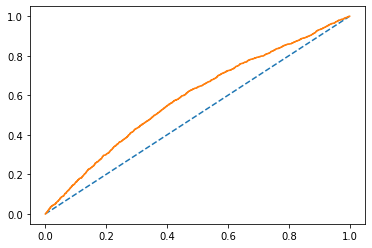

In [ ]:
probs_test = NB_SM_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_test = probs_test[:, 1]
# calculate AUC
nb_test_auc = roc_auc_score(y_test, probs_test)
print('AUC: %.3f' % nb_test_auc)
# calculate roc curve
nb_test_fpr, nb_test_tpr, nb_test_thresholds = roc_curve(y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(nb_test_fpr, nb_test_tpr)

In [ ]:
  y_class_pred=[]
for i in range(0,len(probs_train)):
    if np.array(probs_train)[i]>0.07:
        a=1
    else:
        a=0
    y_class_pred.append(a)

              precision    recall  f1-score   support

           0       0.83      0.26      0.39     14139
           1       0.26      0.83      0.39      4423

    accuracy                           0.39     18562
   macro avg       0.54      0.54      0.39     18562
weighted avg       0.69      0.39      0.39     18562



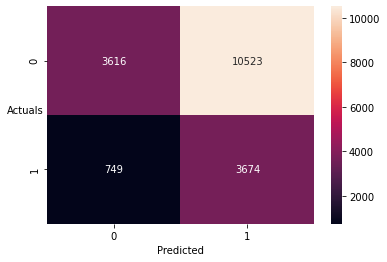

In [ ]:
sns.heatmap((metrics.confusion_matrix(y_train,y_class_pred)),annot=True,fmt='.5g');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
print(metrics.classification_report(y_train,y_class_pred))

AUC: 0.599


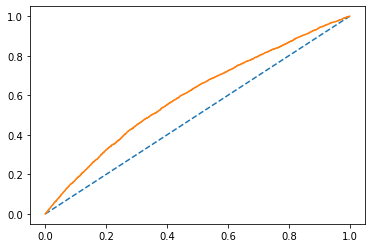

In [ ]:
 y_class_pred
# calculate AUC
nb_train_auc = roc_auc_score(y_train, probs_train)
print('AUC: %.3f' % nb_train_auc)
# calculate roc curve
nb_train_fpr, nb_train_tpr, nb_train_thresholds = roc_curve(y_train, probs_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(nb_train_fpr, nb_train_tpr)

In [ ]:
y_class_pred_t=[]
for i in range(0,len(probs_test)):
    if np.array(probs_test)[i]>0.07:
        a=1
    else:
        a=0
    y_class_pred_t.append(a)

              precision    recall  f1-score   support

           0       0.82      0.25      0.38      6015
           1       0.26      0.83      0.40      1941

    accuracy                           0.39      7956
   macro avg       0.54      0.54      0.39      7956
weighted avg       0.68      0.39      0.39      7956



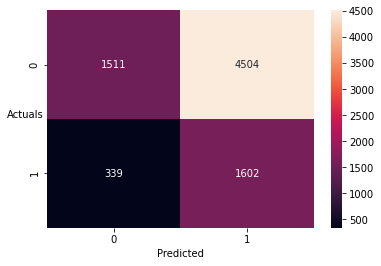

In [ ]:
sns.heatmap((metrics.confusion_matrix(y_test,y_class_pred_t)),annot=True,fmt='.5g');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
print(metrics.classification_report(y_test,y_class_pred_t))

AUC: 0.589


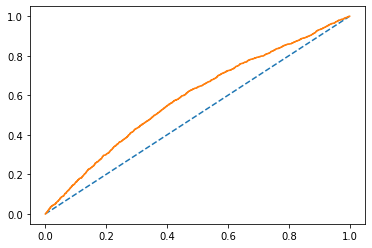

In [ ]:
y_class_pred_t
# calculate AUC
nb_test_auc = roc_auc_score(y_test, probs_test)
print('AUC: %.3f' % nb_test_auc)
# calculate roc curve
nb_test_fpr, nb_test_tpr, nb_test_thresholds = roc_curve(y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(nb_test_fpr, nb_test_tpr)

In [ ]:
  y_class_pred=[]
for i in range(0,len(probs_train)):
    if np.array(probs_train)[i]>0.05:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [ ]:
y_class_pred_t=[]
for i in range(0,len(probs_test)):
    if np.array(probs_test)[i]>0.05:
        a=1
    else:
        a=0
    y_class_pred_t.append(a)

              precision    recall  f1-score   support

           0       0.83      0.21      0.34     14139
           1       0.25      0.86      0.39      4423

    accuracy                           0.37     18562
   macro avg       0.54      0.54      0.36     18562
weighted avg       0.69      0.37      0.35     18562



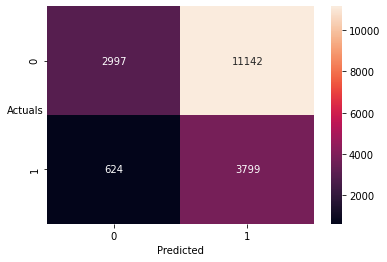

In [ ]:
sns.heatmap((metrics.confusion_matrix(y_train,y_class_pred)),annot=True,fmt='.5g');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
print(metrics.classification_report(y_train,y_class_pred))

AUC: 0.599


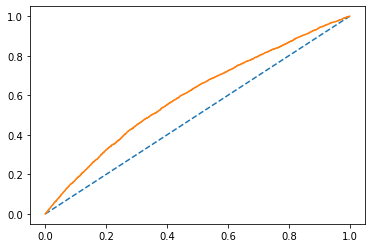

In [ ]:
 y_class_pred
# calculate AUC
nb_train_auc = roc_auc_score(y_train, probs_train)
print('AUC: %.3f' % nb_train_auc)
# calculate roc curve
nb_train_fpr, nb_train_tpr, nb_train_thresholds = roc_curve(y_train, probs_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(nb_train_fpr, nb_train_tpr)

              precision    recall  f1-score   support

           0       0.82      0.21      0.33      6015
           1       0.26      0.86      0.40      1941

    accuracy                           0.37      7956
   macro avg       0.54      0.53      0.36      7956
weighted avg       0.68      0.37      0.35      7956



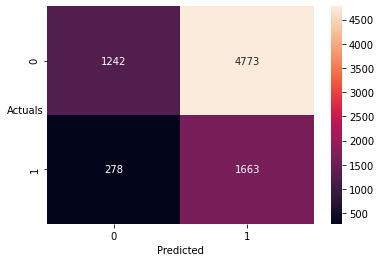

In [ ]:
sns.heatmap((metrics.confusion_matrix(y_test,y_class_pred_t)),annot=True,fmt='.5g');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
print(metrics.classification_report(y_test,y_class_pred_t))

AUC: 0.589


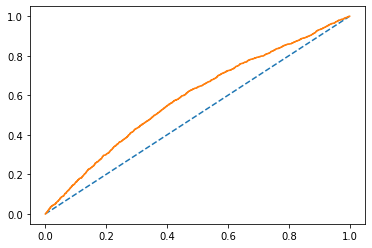

In [ ]:
y_class_pred_t
# calculate AUC
nb_test_auc = roc_auc_score(y_test, probs_test)
print('AUC: %.3f' % nb_test_auc)
# calculate roc curve
nb_test_fpr, nb_test_tpr, nb_test_thresholds = roc_curve(y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(nb_test_fpr, nb_test_tpr)

0.7911862945803254
              precision    recall  f1-score   support

           0       0.81      0.96      0.87     14139
           1       0.65      0.26      0.38      4423

    accuracy                           0.79     18562
   macro avg       0.73      0.61      0.63     18562
weighted avg       0.77      0.79      0.76     18562



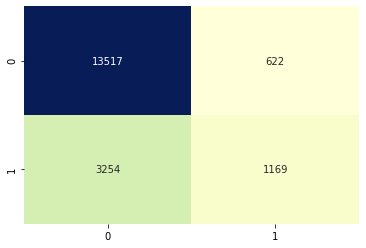

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN_SM_model=KNeighborsClassifier()
KNN_SM_model.fit(X_train,y_train)
y_train_predict = KNN_SM_model.predict(X_train)
model_score = KNN_SM_model.score(X_train, y_train)
print(model_score)
sns.heatmap(metrics.confusion_matrix(y_train, y_train_predict), annot=True,fmt='d', cbar=False,cmap='YlGnBu')
print(metrics.classification_report(y_train, y_train_predict))

0.7217194570135747
              precision    recall  f1-score   support

           0       0.76      0.92      0.83      6015
           1       0.31      0.11      0.16      1941

    accuracy                           0.72      7956
   macro avg       0.53      0.51      0.50      7956
weighted avg       0.65      0.72      0.67      7956



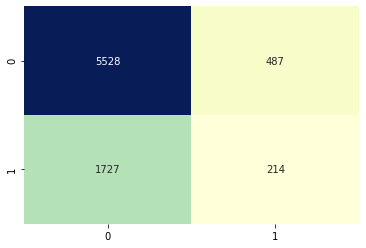

In [ ]:
y_test_predict = KNN_SM_model.predict(X_test)
model_score = KNN_SM_model.score(X_test, y_test)
print(model_score)
sns.heatmap(metrics.confusion_matrix(y_test, y_test_predict), annot=True,fmt='d', cbar=False,cmap='YlGnBu')
print(metrics.classification_report(y_test, y_test_predict))

AUC: 0.803


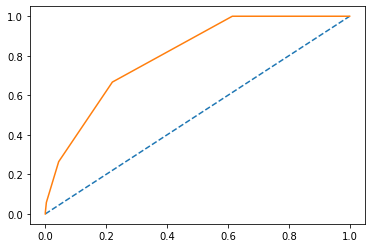

In [ ]:
probs_x = KNN_SM_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_x = probs_x[:, 1]
# calculate AUC
knn_train_auc = roc_auc_score(y_train, probs_x)
print('AUC: %.3f' % knn_train_auc)
# calculate roc curve
knn_train_fpr, knn_train_tpr, knn_train_thresholds = roc_curve(y_train, probs_x)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_train_fpr, knn_train_tpr)

AUC: 0.546


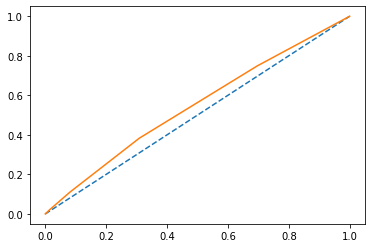

In [ ]:
probs_t = KNN_SM_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_t = probs_t[:, 1]
# calculate AUC
knn_test_auc = roc_auc_score(y_test, probs_t)
print('AUC: %.3f' % knn_test_auc)
# calculate roc curve
knn_test_fpr, knn_test_tpr, knn_test_thresholds = roc_curve(y_test, probs_t)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_test_fpr, knn_test_tpr)

###**SMOTE**

In [ ]:
## !pip install imbalanced-learn


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE(random_state=41)
columns =X_train.columns
sm_data_X,sm_data_y=sm.fit_sample(X_train,y_train)
sm_data_X = pd.DataFrame(data=sm_data_X,columns=columns )
sm_data_y= pd.DataFrame(data=sm_data_y,columns=["Churn"])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
sm_data_y.shape

(28278, 1)

In [ ]:
sm_data_y.describe()

,Churn
count,28278.000000
mean,0.500000
std,0.500009
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [ ]:
sm_data_y.value_counts(normalize=True)

Churn
1        0.5
0        0.5
dtype: float64

In [ ]:
sm_data_X.shape

(28278, 124)

In [ ]:
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(sm_data_X, sm_data_y, test_size=0.3 , random_state=1)

In [ ]:
X_train_res.shape

(19794, 124)

In [ ]:
y_train_res.shape

(19794, 1)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [ ]:
NB_SM_model = GaussianNB()
NB_SM_model.fit(X_train_res, y_train_res)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

0.5777508335859352
              precision    recall  f1-score   support

           0       0.65      0.33      0.44      9822
           1       0.55      0.82      0.66      9972

    accuracy                           0.58     19794
   macro avg       0.60      0.58      0.55     19794
weighted avg       0.60      0.58      0.55     19794



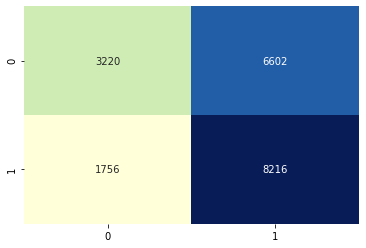

In [ ]:
y_train_predict = NB_SM_model.predict(X_train_res)
model_score = NB_SM_model.score(X_train_res, y_train_res)

print(model_score)
sns.heatmap(metrics.confusion_matrix(y_train_res, y_train_predict), annot=True,fmt='d', cbar=False,cmap='YlGnBu')
print(metrics.classification_report(y_train_res ,y_train_predict))

0.5682461103253182
              precision    recall  f1-score   support

           0       0.65      0.32      0.43      4317
           1       0.54      0.82      0.65      4167

    accuracy                           0.57      8484
   macro avg       0.60      0.57      0.54      8484
weighted avg       0.60      0.57      0.54      8484



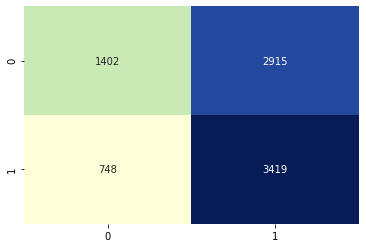

In [ ]:
y_test_predict = NB_SM_model.predict(X_test_res)
model_score = NB_SM_model.score(X_test_res, y_test_res)
print(model_score)
sns.heatmap(metrics.confusion_matrix(y_test_res, y_test_predict), annot=True,fmt='d', cbar=False,cmap='YlGnBu')
print(metrics.classification_report(y_test_res, y_test_predict))

AUC: 0.692


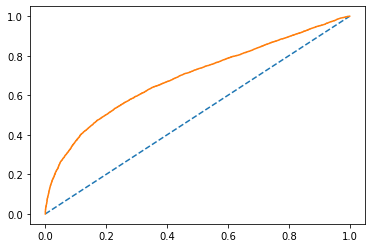

In [ ]:
probs_tr_s = NB_SM_model.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs_tr_s = probs_tr_s[:, 1]
# calculate AUC
nb_train_auc = roc_auc_score(y_train_res, probs_tr_s)
print('AUC: %.3f' % nb_train_auc)
# calculate roc curve
nb_train_fpr, nb_train_tpr, nb_train_thresholds = roc_curve(y_train_res, probs_tr_s)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(nb_train_fpr, nb_train_tpr)

AUC: 0.680


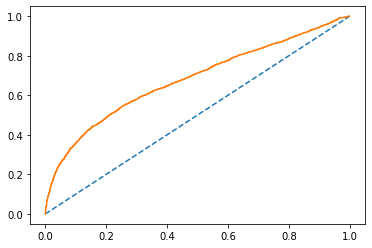

In [ ]:
probs_tst_s = NB_SM_model.predict_proba(X_test_res)
# keep probabilities for the positive outcome only
probs_tst_s = probs_tst_s[:, 1]
# calculate AUC
nb_test_auc = roc_auc_score(y_test_res, probs_tst_s)
print('AUC: %.3f' % nb_test_auc)
# calculate roc curve
nb_test_fpr, nb_test_tpr, nb_test_thresholds = roc_curve(y_test_res, probs_tst_s)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(nb_test_fpr, nb_test_tpr)

In [ ]:
  y_class_pred=[]
for i in range(0,len(probs_tr_s)):
    if np.array(probs_tr_s)[i]>0.05:
        a=1
    else:
        a=0
    y_class_pred.append(a)

              precision    recall  f1-score   support

           0       0.66      0.15      0.24      9822
           1       0.52      0.93      0.67      9972

    accuracy                           0.54     19794
   macro avg       0.59      0.54      0.45     19794
weighted avg       0.59      0.54      0.46     19794



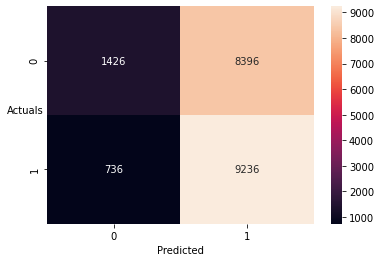

In [ ]:
sns.heatmap((metrics.confusion_matrix(y_train_res,y_class_pred)),annot=True,fmt='.5g');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
print(metrics.classification_report(y_train_res,y_class_pred))

AUC: 0.692


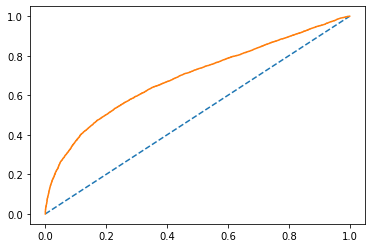

In [ ]:
 y_class_pred
# calculate AUC
nb_train_auc = roc_auc_score(y_train_res, probs_tr_s)
print('AUC: %.3f' % nb_train_auc)
# calculate roc curve
nb_train_fpr, nb_train_tpr, nb_train_thresholds = roc_curve(y_train_res, probs_tr_s)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(nb_train_fpr, nb_train_tpr)

In [ ]:
y_class_pred_t=[]
for i in range(0,len(probs_tst_s)):
    if np.array(probs_tst_s)[i]>0.05:
        a=1
    else:
        a=0
    y_class_pred_t.append(a)

              precision    recall  f1-score   support

           0       0.65      0.15      0.24      4317
           1       0.51      0.92      0.65      4167

    accuracy                           0.53      8484
   macro avg       0.58      0.53      0.45      8484
weighted avg       0.58      0.53      0.44      8484



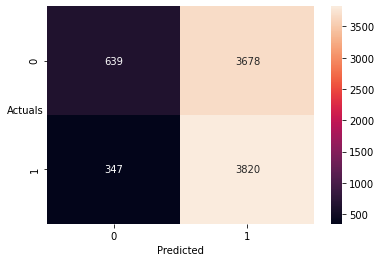

In [ ]:
sns.heatmap((metrics.confusion_matrix(y_test_res,y_class_pred_t)),annot=True,fmt='.5g');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
print(metrics.classification_report(y_test_res,y_class_pred_t))

In [ ]:
y_class_pred_t
# calculate AUC
nb_test_auc = roc_auc_score(y_test_res, probs_tst_s)
print('AUC: %.3f' % nb_test_auc)
# calculate roc curve
nb_test_fpr, nb_test_tpr, nb_test_thresholds = roc_curve(y_test_res, probs_tst_s)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(nb_test_fpr, nb_test_tpr)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNN_SM_model=KNeighborsClassifier()
KNN_SM_model.fit(X_train_res,y_train_res)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

0.8075174295240982
              precision    recall  f1-score   support

           0       0.92      0.67      0.78      9822
           1       0.74      0.94      0.83      9972

    accuracy                           0.81     19794
   macro avg       0.83      0.81      0.80     19794
weighted avg       0.83      0.81      0.80     19794



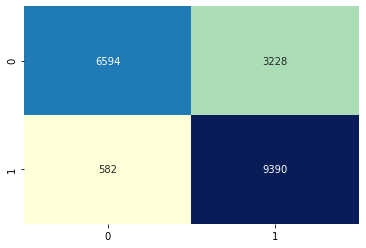

In [ ]:
y_train_predict = KNN_SM_model.predict(X_train_res)
model_score = KNN_SM_model.score(X_train_res, y_train_res)
print(model_score)
sns.heatmap(metrics.confusion_matrix(y_train_res, y_train_predict), annot=True,fmt='d', cbar=False,cmap='YlGnBu')
print(metrics.classification_report(y_train_res, y_train_predict))

0.7115747289014616
              precision    recall  f1-score   support

           0       0.83      0.55      0.66      4317
           1       0.65      0.88      0.75      4167

    accuracy                           0.71      8484
   macro avg       0.74      0.71      0.70      8484
weighted avg       0.74      0.71      0.70      8484



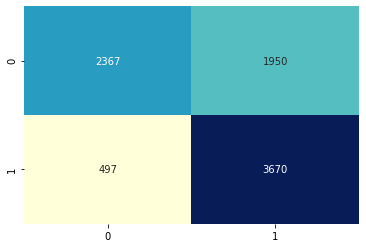

In [ ]:
y_test_predict = KNN_SM_model.predict(X_test_res)
model_score = KNN_SM_model.score(X_test_res, y_test_res)
print(model_score)
sns.heatmap(metrics.confusion_matrix(y_test_res, y_test_predict), annot=True,fmt='d', cbar=False,cmap='YlGnBu')
print(metrics.classification_report(y_test_res, y_test_predict))

AUC: 0.930


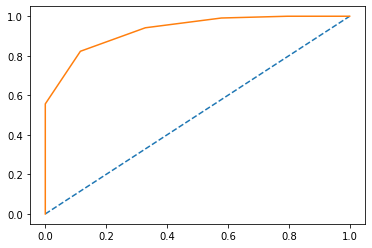

In [ ]:
probs = KNN_SM_model.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_train_auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % knn_train_auc)
# calculate roc curve
knn_train_fpr, knn_train_tpr, knn_train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_train_fpr, knn_train_tpr)

AUC: 0.805


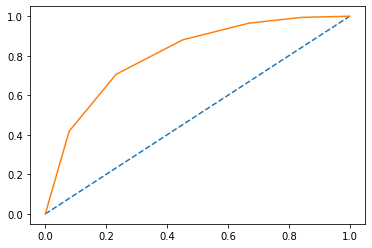

In [ ]:
probs = KNN_SM_model.predict_proba(X_test_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_test_auc = roc_auc_score(y_test_res, probs)
print('AUC: %.3f' % knn_test_auc)
# calculate roc curve
knn_test_fpr, knn_test_tpr, knn_test_thresholds = roc_curve(y_test_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_test_fpr, knn_test_tpr)

In [ ]:
LDA_model= LinearDiscriminantAnalysis()
LDA_model.fit(X_train_res, y_train_res)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

0.6132161260988178
              precision    recall  f1-score   support

           0       0.62      0.59      0.60      9822
           1       0.61      0.64      0.62      9972

    accuracy                           0.61     19794
   macro avg       0.61      0.61      0.61     19794
weighted avg       0.61      0.61      0.61     19794



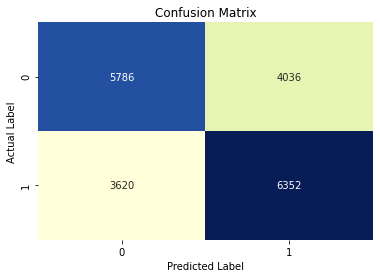

In [ ]:
y_train_predict = LDA_model.predict(X_train_res)
model_score = LDA_model.score(X_train_res, y_train_res)
print(model_score)
sns.heatmap(metrics.confusion_matrix(y_train_res, y_train_predict), annot=True,fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
print(metrics.classification_report(y_train_res, y_train_predict))

0.5972418670438473
              precision    recall  f1-score   support

           0       0.61      0.58      0.59      4317
           1       0.59      0.62      0.60      4167

    accuracy                           0.60      8484
   macro avg       0.60      0.60      0.60      8484
weighted avg       0.60      0.60      0.60      8484



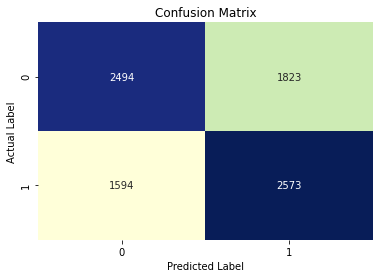

In [ ]:
## Performance Matrix on test data set
y_test_predict = LDA_model.predict(X_test_res)
model_score = LDA_model.score(X_test_res, y_test_res)
print(model_score)
sns.heatmap(metrics.confusion_matrix(y_test_res, y_test_predict), annot=True,fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
print(metrics.classification_report(y_test_res, y_test_predict))

AUC: 0.655


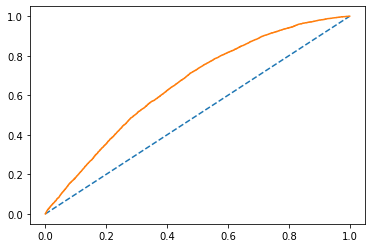

In [ ]:
probs = LDA_model.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_train_auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % lda_train_auc)
# calculate roc curve
lda_train_fpr, lda_train_tpr, lda_train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_train_fpr, lda_train_tpr)

AUC: 0.636


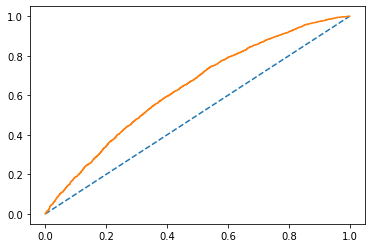

In [ ]:
probs = LDA_model.predict_proba(X_test_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_test_auc = roc_auc_score(y_test_res, probs)
print('AUC: %.3f' % lda_test_auc)
# calculate roc curve
lda_test_fpr, lda_test_tpr, lda_test_thresholds = roc_curve(y_test_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_test_fpr, lda_test_tpr)

In [ ]:
  grid={'penalty':['l2','none'],
        'solver':['sag','lbfgs'],
        'tol':[0.0001,0.00001]}

In [ ]:
LR_model = LogisticRegression(max_iter=10000,n_jobs=-1)

In [ ]:
grid_search = GridSearchCV(estimator = LR_model, param_grid = grid, cv = 5,n_jobs=-1,scoring='f1')

In [ ]:
grid_search.fit(X_train_res, y_train_res)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KeyboardInterrupt: ignored

In [ ]:
LR_best_model = grid_search.best_estimator_

In [ ]:
ytrain_predict = LR_best_model.predict(X_train_res)
ytest_predict = LR_best_model.predict(X_test_res)

In [ ]:
ytest_predict_prob=LR_best_model.predict_proba(X_test_res)
pd.DataFrame(ytest_predict_prob).head()

In [ ]:
LR_model_score = LR_best_model.score(X_train_res, y_train_res)
print(LR_model_score)
sns.heatmap(metrics.confusion_matrix(y_train_res, ytrain_predict), annot=True,fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
print(metrics.classification_report(y_train_res, ytrain_predict))

In [ ]:
LR_model_score = LR_best_model.score(X_test_res, y_test_res)
print(LR_model_score)
sns.heatmap(metrics.confusion_matrix(y_test_res, ytest_predict), annot=True,fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
print(metrics.classification_report(y_test_res, ytest_predict))

In [ ]:
probs = LR_best_model.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
logit_train_auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % logit_train_auc)
# calculate roc curve
logit_train_fpr, logit_train_tpr, logit_train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(logit_train_fpr, logit_train_tpr)

In [ ]:
probs = LR_best_model.predict_proba(X_test_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
logit_test_auc = roc_auc_score(y_test_res, probs)
print('AUC: %.3f' % logit_test_auc)
# calculate roc curve
logit_test_fpr, logit_test_tpr, logit_test_thresholds = roc_curve(y_test_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(logit_test_fpr, logit_test_tpr)

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=1)
Bagging_model.fit(X_train_res, y_train_res)

In [ ]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train_res)
model_score =Bagging_model.score(X_train_res, y_train_res)
print(model_score)
sns.heatmap(metrics.confusion_matrix(y_train_res, y_train_predict), annot=True,fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
print(metrics.classification_report(y_train_res, y_train_predict))

In [ ]:
y_test_predict = Bagging_model.predict(X_test_res)
model_score = Bagging_model.score(X_test_res, y_test_res)
print(model_score)
sns.heatmap(metrics.confusion_matrix(y_test_res, y_test_predict), annot=True,fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
print(metrics.classification_report(y_test_res, y_test_predict))

In [ ]:
probs = Bagging_model.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
bg_train_auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % bg_train_auc)
# calculate roc curve
bg_train_fpr, bg_train_tpr, bg_train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(bg_train_fpr, bg_train_tpr)

In [ ]:
# plot the roc curve for the model
probs = Bagging_model.predict_proba(X_test_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
bg_test_auc = roc_auc_score(y_test_res, probs)
print('AUC: %.3f' % bg_test_auc)
# calculate roc curve
bg_test_fpr, bg_test_tpr, bg_test_thresholds = roc_curve(y_test_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(bg_test_fpr, bg_test_tpr)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier


ADB_model = AdaBoostClassifier(n_estimators=100,random_state=40)
ADB_model.fit(X_train_res,y_train_res)

In [ ]:
y_train_predict = ADB_model.predict(X_train_res)
model_score = ADB_model.score(X_train_res, y_train_res)
print(model_score)
sns.heatmap(metrics.confusion_matrix(y_train_res, y_train_predict), annot=True,fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
print(metrics.classification_report(y_train_res, y_train_predict))

In [ ]:
y_test_predict = ADB_model.predict(X_test_res)
model_score = ADB_model.score(X_test_res, y_test_res)
print(model_score)
sns.heatmap(metrics.confusion_matrix(y_test_res, y_test_predict), annot=True,fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
print(metrics.classification_report(y_test_res, y_test_predict))

In [ ]:
probs = ADB_model.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
ad_train_auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % ad_train_auc)
# calculate roc curve
ad_train_fpr, ad_train_tpr, ad_train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ad_train_fpr, ad_train_tpr)

In [ ]:
# plot the roc curve for the model
probs = ADB_model.predict_proba(X_test_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
ad_test_auc = roc_auc_score(y_test_res, probs)
print('AUC: %.3f' % ad_test_auc)
# calculate roc curve
ad_test_fpr, ad_test_tpr, ad_test_thresholds = roc_curve(y_test_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ad_test_fpr, ad_test_tpr)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train_res, y_train_res)

In [ ]:
y_train_predict = gbcl.predict(X_train_res)
model_score = gbcl.score(X_train_res, y_train_res)
print(model_score)
sns.heatmap(metrics.confusion_matrix(y_train_res, y_train_predict), annot=True,fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
print(metrics.classification_report(y_train_res, y_train_predict))

In [ ]:
y_test_predict = gbcl.predict(X_test_res)
model_score = gbcl.score(X_test_res, y_test_res)
print(model_score)
sns.heatmap(metrics.confusion_matrix(y_test_res, y_test_predict), annot=True,fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
print(metrics.classification_report(y_test_res, y_test_predict))

In [ ]:
probs = gbcl.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
gb_train_auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % gb_train_auc)
# calculate roc curve
gb_train_fpr, gb_train_tpr, gb_train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gb_train_fpr, gb_train_tpr)

In [ ]:
# plot the roc curve for the model
probs = gbcl.predict_proba(X_test_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
gb_test_auc = roc_auc_score(y_test_res, probs)
print('AUC: %.3f' % gb_test_auc)
# calculate roc curve
gb_test_fpr, gb_test_tpr, gb_test_thresholds = roc_curve(y_test_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gb_test_fpr, gb_test_tpr)